In [1]:
%matplotlib inline

In [313]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#import root_pandas
import pandas as pd
import uproot
import root_pandas
import math
import numpy as np
from scipy import stats
import scipy.stats
from scipy.stats import norm
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
import os

Welcome to JupyROOT 6.22/02


In [3]:
def openfile(filename):
    file = uproot.open(filename)
    pretree = file['pr_tree']
    tree = pretree['pr_tree']
    res = tree["pt_resolution"].array()
    pt =  tree["pt_truth"].array()
    pte = tree["pt_estimate"].array()
    df = pd.DataFrame({'pt_resolution': res, 'pt_truth': pt, 'pt_estimate':pte})
    df['pt_sub'] = df['pt_estimate']-df['pt_truth']
    #df = df[df['pt_resolution'] <= 0.1]
    file.close()
    
    return df

In [4]:
D = {} 

pitches = ['50', '200', '1000']
numpitch = len(pitches)

efficiencies = ['50', '95', '100']
numeff = len(efficiencies)

momenta = ['400', '500', '600', '700', '1000', '2000', '3000', '4000']
nummom = len(momenta)

for p in pitches:
    for e in efficiencies:
        for m in momenta:
            D["df_{0}".format('p'+p+'e'+e+'_PT'+m+'MeV')] = openfile('p'+p+'e'+e+'/p'+p+'e'+e+'_PT'+m+'MeV.root')
            #print('p'+p+'e'+e+'/p'+p+'e'+e+'_PT'+m+'MeV.root')

for pe in ['ideal', 'idealDiff']:
    for m in momenta:
        D["df_{0}".format(pe+'_PT'+m+'MeV')] = openfile(pe+'/'+pe+'_PT'+m+'MeV.root')
        
for m in momenta:
    D["df_{0}".format(pe+'_PT'+m+'MeV')] = openfile(pe+'/'+pe+'_PT'+m+'MeV.root')
        
p='50'
e='75'
for m in momenta:
    D["df_{0}".format('thinwall_PT'+m+'MeV')] = openfile('thinwall/p50e95_PT'+m+'MeV.root')

D

{'df_p50e50_PT400MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0         0.000014       0.4     0.397804 -0.002196
 1         0.000011       0.4     0.396997 -0.003003
 2         0.000006       0.4     0.400683  0.000683
 3         0.000012       0.4     0.399782 -0.000218
 4         0.000013       0.4     0.399157 -0.000843
 ..             ...       ...          ...       ...
 995       0.000005       0.4     0.401861  0.001861
 996       0.000031       0.4     0.402833  0.002833
 997       0.000009       0.4     0.399650 -0.000350
 998       0.000019       0.4     0.401711  0.001711
 999       0.000009       0.4     0.402138  0.002138
 
 [1000 rows x 4 columns],
 'df_p50e50_PT500MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0         0.000013       0.5     0.498708 -0.001292
 1         0.000011       0.5     0.499608 -0.000392
 2         0.000005       0.5     0.500609  0.000609
 3         0.000010       0.5     0.497214 -0.002786
 4         0.000014       0

In [5]:
D['df_p1000e50_PT700MeV']['pt_resolution'].equals(D['df_p50e50_PT1000MeV']['pt_resolution'])
D['df_p50e50_PT500MeV']

,pt_resolution,pt_truth,pt_estimate,pt_sub
0,0.000013,0.5,0.498708,-0.001292
1,0.000011,0.5,0.499608,-0.000392
2,0.000005,0.5,0.500609,0.000609
3,0.000010,0.5,0.497214,-0.002786
4,0.000014,0.5,0.496473,-0.003527
...,...,...,...,...
995,0.000007,0.5,0.502557,0.002557
996,0.000029,0.5,0.504178,0.004178
997,0.000008,0.5,0.500576,0.000576
998,0.000017,0.5,0.500749,0.000749


<AxesSubplot:>

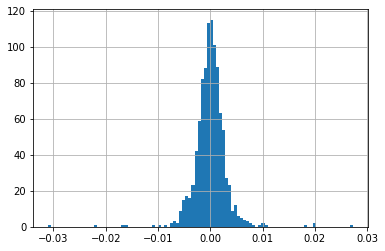

In [6]:
dftest=D['df_p50e50_PT500MeV']
(dftest['pt_estimate']-dftest["pt_truth"]).hist(bins=100)

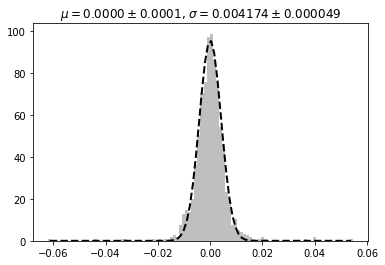

In [7]:
fig, ax = plt.subplots() 
nbins = 100
x = (dftest['pt_sub']/dftest['pt_truth'])[abs(dftest['pt_sub'])<0.05]
n, bins, patches = ax.hist( x,nbins, density=True, facecolor = 'grey', alpha = 0.5, label='before')

centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n, p0=[0,1])

ax.plot(centers, norm.pdf(centers,*pars), 'k--',linewidth = 2, label='fit before') 
ax.set_title('$\mu={:.4f}\pm{:.4f}$, $\sigma={:.6f}\pm{:.6f}$'.format(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ])))

plt.show()

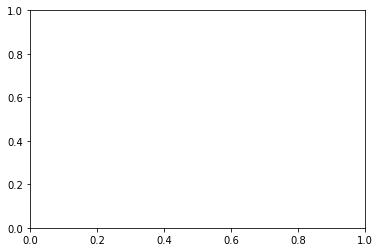

In [8]:
fig, ax = plt.subplots()
def getRes(x, nbins=100):
    ax.clear()
    n, bins, patches = ax.hist(x ,nbins, density=True, facecolor = 'grey', alpha = 0.5, label='before')
    
    centers = (0.5*(bins[1:]+bins[:-1]))
    pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n, p0=[0,1])
    
    return pars[1], np.sqrt(cov[1, 1])

In [9]:
sigma, errorsigma = getRes((dftest['pt_sub']/dftest['pt_truth'])[abs(dftest['pt_sub'])<0.05])
print(sigma, errorsigma)

0.004173535058163998 4.900457066350992e-05


In [10]:
ptmean = dftest['pt_truth'].mean()            
resmean = dftest['pt_sub'].std()/ptmean
errmean = dftest['pt_sub'].sem()/ptmean
print(resmean, errmean)

0.0063177502278442595 0.0001997848040803559


In [11]:
D['df_ideal_PT500MeV']

,pt_resolution,pt_truth,pt_estimate,pt_sub
0,0.000008,0.5,0.500050,0.000050
1,0.000005,0.5,0.500200,0.000200
2,0.000005,0.5,0.501911,0.001911
3,0.000009,0.5,0.498370,-0.001630
4,0.000006,0.5,0.498079,-0.001921
...,...,...,...,...
995,0.000002,0.5,0.502317,0.002317
996,0.000014,0.5,0.503206,0.003206
997,0.000007,0.5,0.500219,0.000219
998,0.000012,0.5,0.500642,0.000642


In [12]:
def PitchRes(pitch):
    DP = {}
    numeff=4
    pts = np.zeros(shape=(numeff, nummom))
    ptres = np.zeros(shape=(numeff, nummom))
    reserr = np.zeros(shape=(numeff, nummom))

    ie = 0
    efficiencies = ['50', '95', '100']
    for e in efficiencies:
        im = 0
        for m in momenta:
            ptmean=0
            resmean=0
            errmean=0
            
            df = D['df_{0}'.format('p'+pitch+'e'+e+'_PT'+m+'MeV')] 
            
            ptmean = df['pt_truth'].mean()
            pts[ie][im] = ptmean
            
            #resmean = df['pt_sub'].std()/ptmean
            resmean, errmean = getRes(df['pt_sub']/ptmean)
            ptres[ie][im] = resmean
            
            #errmean = df['pt_sub'].sem()/ptmean
            reserr[ie][im] = errmean
            #print(ptmean, resmean, errmean)
            im = im+1
            
        DP["df_{0}".format('e'+e)] = pd.DataFrame({'pts': pts[ie], 'res': ptres[ie], 'std': reserr[ie]})
        ie = ie+1
    
    return DP

D_P50 = PitchRes('50')
D_P200 = PitchRes('200')
D_P1000 = PitchRes('1000')
D_P50['df_e50']

,pts,res,std
0,0.4,0.004119,0.000053
1,0.5,0.004174,0.000049
2,0.6,0.004138,0.000073
3,0.7,0.004123,0.000050
4,1.0,0.004312,0.000048
5,2.0,0.005521,0.000092
6,3.0,0.006356,0.000117
7,4.0,0.007938,0.000152


In [13]:
def EffRes(eff):
    DE = {}
    pts = np.zeros(shape=(numpitch, nummom))
    ptres = np.zeros(shape=(numpitch, nummom))
    reserr = np.zeros(shape=(numpitch, nummom))

    ip = 0   
    for p in pitches:
        im = 0
        for m in momenta:
            ptmean=0
            resmean=0
            errmean=0
            
            df = D['df_{0}'.format('p'+p+'e'+eff+'_PT'+m+'MeV')] 
            
            ptmean = df['pt_truth'].mean()
            pts[ip][im] = ptmean
            
            #resmean = df['pt_sub'].std()/ptmean
            resmean, errmean = getRes(df['pt_sub']/ptmean)
            ptres[ip][im] = resmean
            
            #errmean = df['pt_sub'].sem()/ptmean
            reserr[ip][im] = errmean
            #print(ptmean, resmean, errmean)
            im = im+1
            
        DE["df_{0}".format('p'+p)] = pd.DataFrame({'pts': pts[ip], 'res': ptres[ip], 'std': reserr[ip]})
        ip = ip+1
    
    return DE

D_E50 = EffRes('50')
D_E95 = EffRes('95')
D_E100 = EffRes('100')
D_E100['df_p50']

,pts,res,std
0,0.4,0.004136,0.000066
1,0.5,0.004206,0.000063
2,0.6,0.004048,0.000044
3,0.7,0.003879,0.000049
4,1.0,0.004049,0.000049
5,2.0,0.004543,0.000053
6,3.0,0.005461,0.000069
7,4.0,0.006567,0.000109


In [14]:
def IdealRes(ideal):
    DI = {}
    pts = np.zeros(shape=(nummom))
    ptres = np.zeros(shape=(nummom))
    reserr = np.zeros(shape=(nummom))

    
    im = 0
    for m in momenta:
        ptmean=0
        resmean=0
        errmean=0
            
        df = D['df_{0}'.format(ideal+'_PT'+m+'MeV')] 
        #print(ideal+'_PT'+m+'MeV')
            
        ptmean = df['pt_truth'].mean()
        pts[im] = ptmean
            
        #resmean = df['pt_sub'].std()/ptmean
        resmean, errmean = getRes(df['pt_sub']/ptmean)
        ptres[im] = resmean
            
        #errmean = df['pt_sub'].sem()/ptmean
        reserr[im] = errmean
        #print(ptmean, resmean, errmean)
        im = im+1
            
    DI = pd.DataFrame({'pts': pts, 'res': ptres, 'std': reserr})
    
    return DI

D_I = IdealRes('ideal')
D_ID = IdealRes('idealDiff')
D_TW = IdealRes('thinwall')
D_TW

,pts,res,std
0,0.4,0.003846,0.000047
1,0.5,0.003962,0.000083
2,0.6,0.003806,0.000050
3,0.7,0.003758,0.000041
4,1.0,0.003857,0.000045
5,2.0,0.004675,0.000052
6,3.0,0.005838,0.000064
7,4.0,0.006593,0.000112


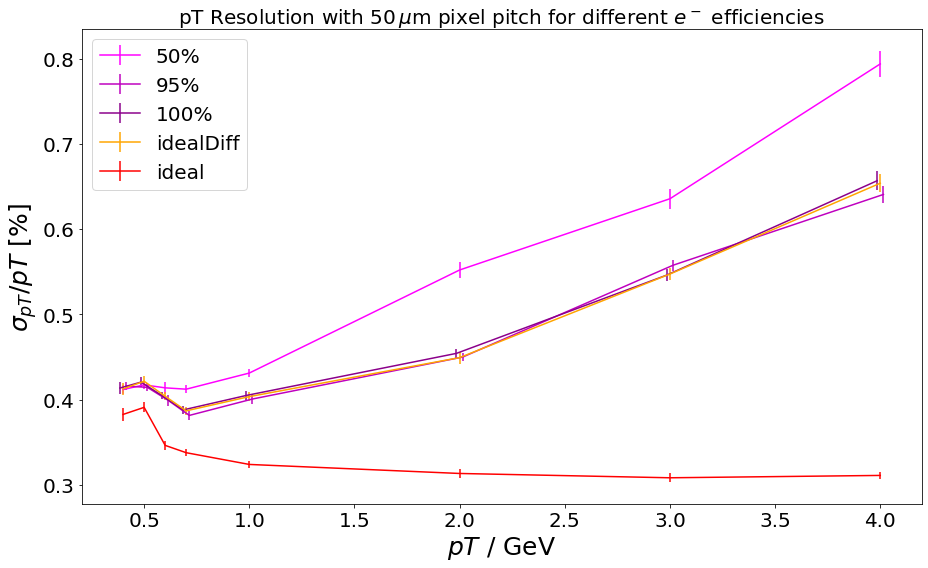

In [15]:
def PlotPTPitch(data, pitch):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz=0

    df1 = data['df_e50']
    df2 = data['df_e95']
    df3 = data['df_e100']
    
    plt.errorbar(x=df1['pts'], y=df1['res']*100, markersize=mz, label='50%', color='magenta', yerr=df1['std']*100)
    plt.errorbar(x=df2['pts']+0.015, y=df2['res']*100, markersize=mz, label='95%', color='m', yerr=df2['std']*100)
    plt.errorbar(x=df3['pts']-0.015, y=df3['res']*100, markersize=mz, label='100%', color='darkmagenta', yerr=df3['std']*100)
    
    plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='orange', yerr=D_ID['std']*100)
    plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel('$pT$ / GeV', fontsize=25)
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    plt.title(r"pT Resolution with " +pitch+ "$\,\mu$m pixel pitch for different $e^-$ efficiencies", fontsize=20)
    #plt.title(r"pT Resolution with " +pitch+ "$\,\mu$m pixel pitch and 95% $e^-$ efficiency", fontsize=20)
    
    fig.tight_layout()
    plt.savefig('pTRes_P'+pitch+'.pdf')

PlotPTPitch(D_P50, '50')

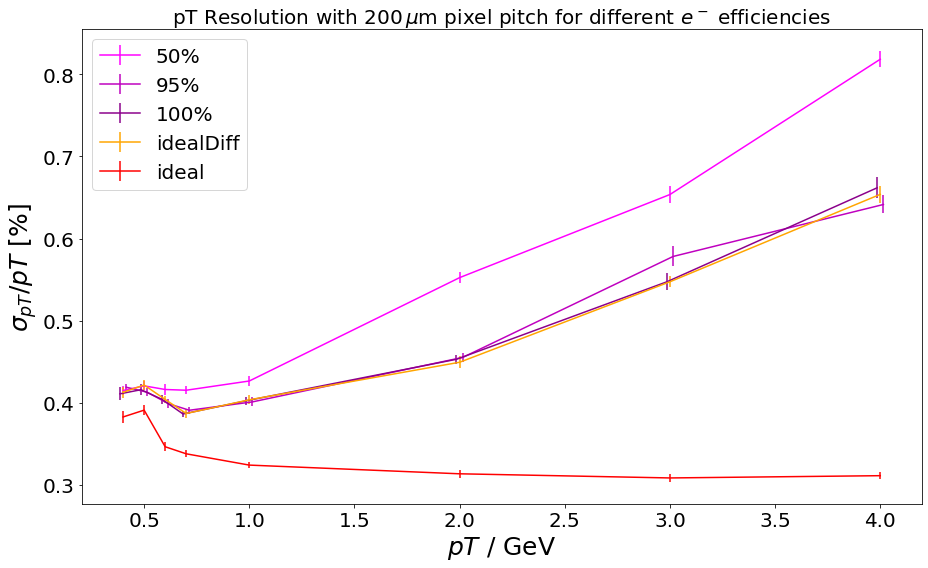

In [16]:
PlotPTPitch(D_P200, '200')

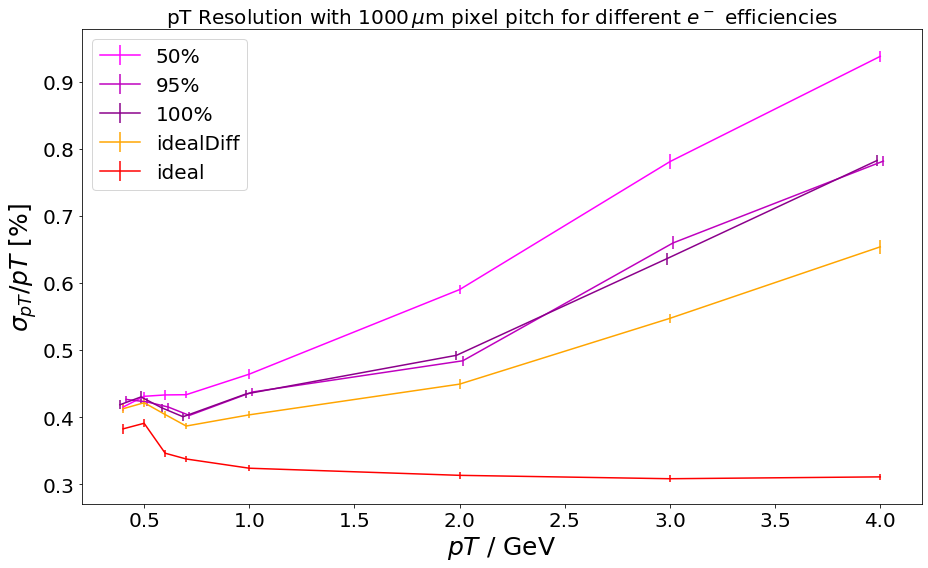

In [17]:
PlotPTPitch(D_P1000, '1000')

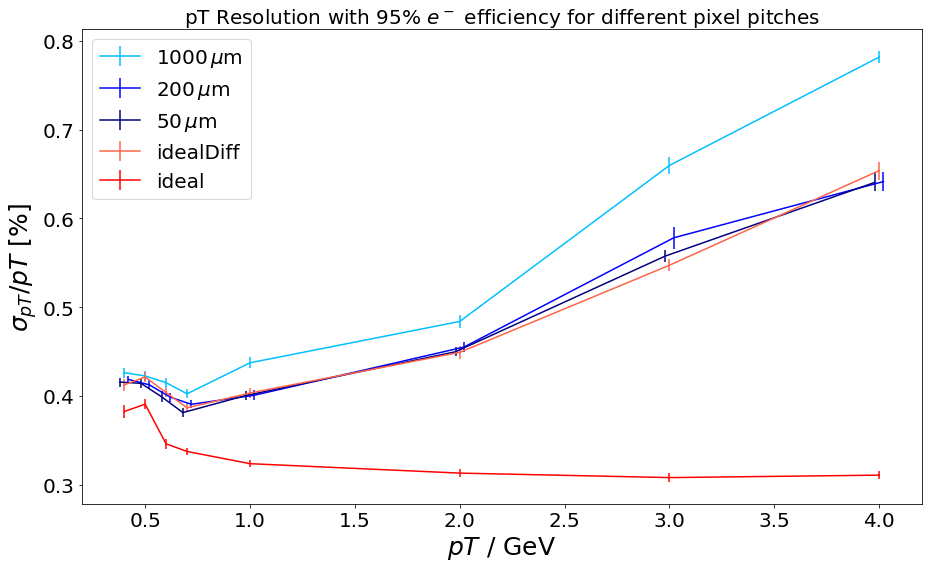

In [18]:
def PlotPTEff(data, eff):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    df1 = data['df_p50']
    df2 = data['df_p200']
    df3 = data['df_p1000']
    
    plt.errorbar(x=df3['pts'], y=df3['res']*100, label='1000$\,\mu$m', markersize=mz, color='deepskyblue', yerr=df3['std']*100)
    plt.errorbar(x=df2['pts']+0.02, y=df2['res']*100, label='200$\,\mu$m', markersize=mz, color='blue', yerr=df2['std']*100)
    plt.errorbar(x=df1['pts']-0.02, y=df1['res']*100, label='50$\,\mu$m', markersize=mz, color='navy', yerr=df1['std']*100)
    
    plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel('$pT$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency for different pixel pitches', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_E'+eff+'.pdf')

PlotPTEff(D_E95, '95')

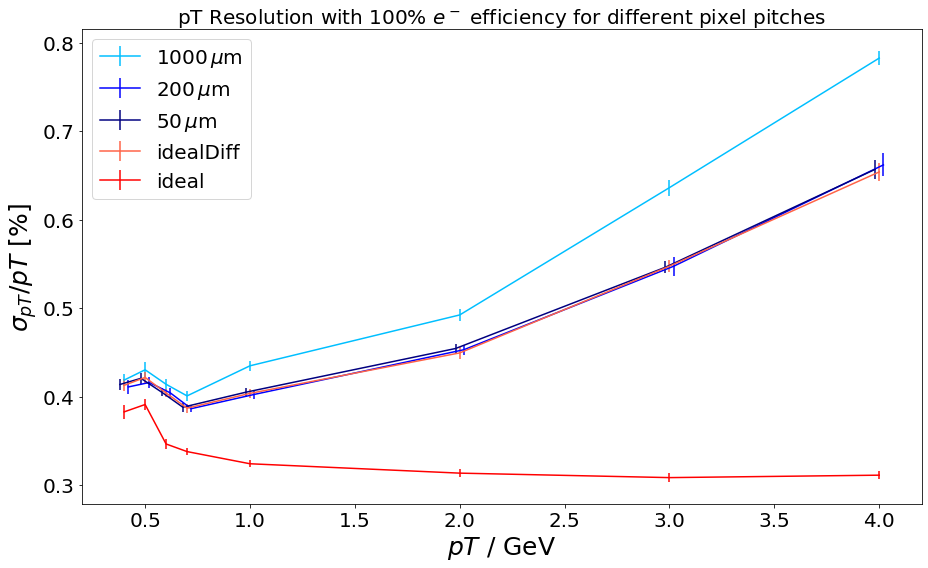

In [19]:
PlotPTEff(D_E100, '100')

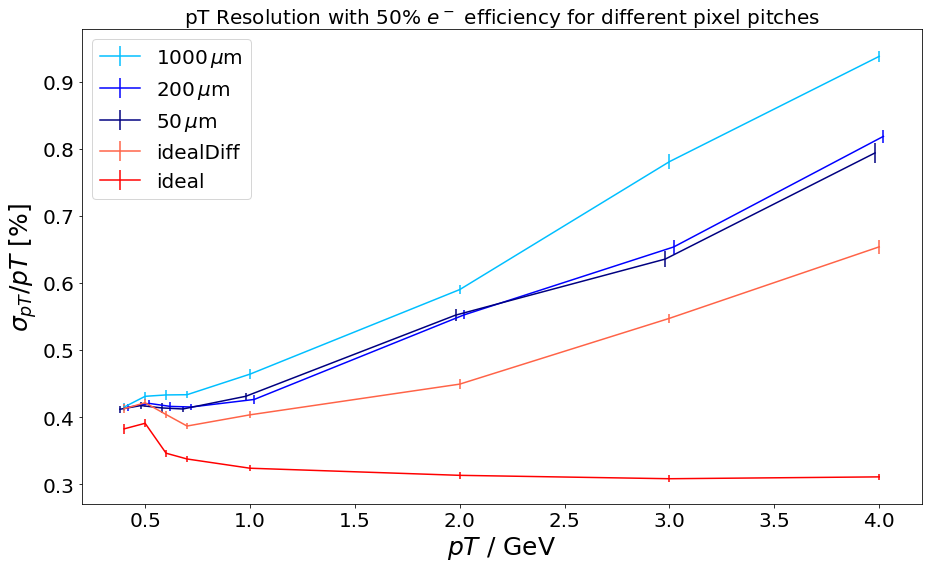

In [20]:
PlotPTEff(D_E50, '50')

In [21]:
x = np.linspace(0.4, 4.0, 400)

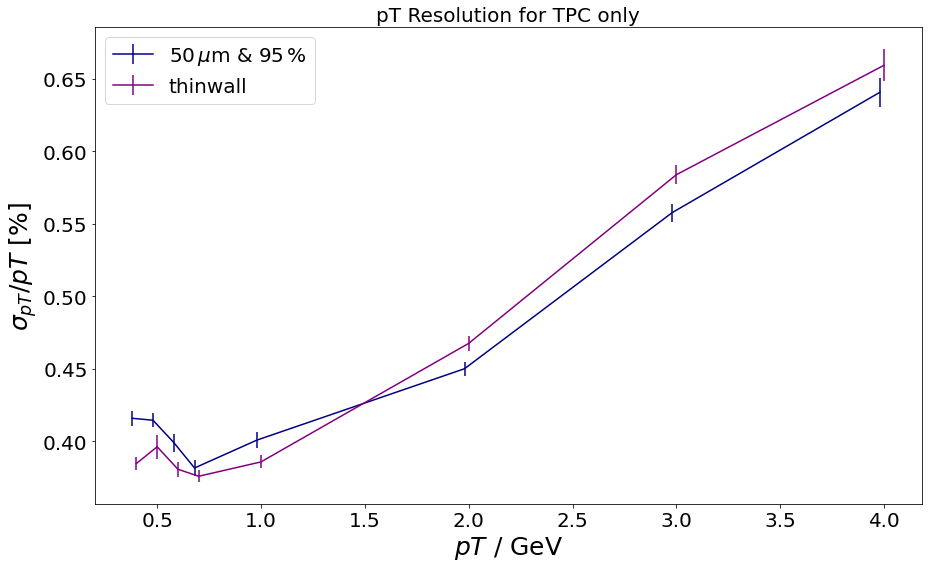

In [22]:
def PlotPT1000(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 10
    fmt='+'

    df1 = data['df_p50']
    #df2 = data['df_p200']
    #df3 = data['df_p1000']
    
    #plt.errorbar(x=df3['pts'], y=df3['res']*100, label='1000$\,\mu$m', markersize=mz, color='deepskyblue', yerr=df3['std']*100)
    #plt.errorbar(x=df2['pts']+0.02, y=df2['res']*100, label='200$\,\mu$m', markersize=mz, color='blue', yerr=df2['std']*100)
    plt.errorbar(x=df1['pts']-0.02, y=df1['res']*100, label='50$\,\mu$m & $95\,$%', markersize=mz, color='navy', yerr=df1['std']*100)
    
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    #plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    plt.errorbar(x=D_TW['pts'], y=D_TW['res']*100, markersize=mz, label='thinwall', color='purple', yerr=D_TW['std']*100)
    #plt.plot(x, 0.002*x)
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel('$pT$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20) 
    plt.title(r'pT Resolution for TPC only', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_TPConly_noideal_95_thinwall.pdf')

PlotPT1000(D_E95)

# VTXtended Files

In [23]:
def openfile(filename):
    file = uproot.open(filename)
    pretree = file['pr_tree']
    tree = pretree['pr_tree']
    res = tree["pt_resolution"].array()
    pt =  tree["pt_truth"].array()
    pte = tree["pt_estimate"].array()
    df = pd.DataFrame({'pt_resolution': res, 'pt_truth': pt, 'pt_estimate':pte})
    df['pt_sub'] = df['pt_estimate']-df['pt_truth']
    
    df = df.dropna()
    df = df.reset_index(drop=True)
    #df = df[df['pt_resolution'] <= 0.05]
    file.close()
    
    return df

In [24]:
DVTX = {} 

pitches = ['50']
numpitch = len(pitches)

efficiencies = ['95']
numeff = len(efficiencies)

#momenta = ['400', '500', '600', '700', '1000', '2000', '3000', '4000']
momenta = ['300', '350', '400', '500', '600', '700', '800', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
nummom = len(momenta)

for p in pitches:
    for e in efficiencies:
        for m in momenta:
            DVTX["df_{0}".format('p'+p+'e'+e+'_PT'+m+'MeV')] = openfile('VTXtended/Muon/1000/TPCSimulationsAndreas_v2/Pitch'+p+'_SEE'+e+'_PT'+m+'MeV.root')
            #print('p'+p+'e'+e+'/p'+p+'e'+e+'_PT'+m+'MeV.root')

momenta = ['400', '500', '600', '700', '1000', '2000', '3000', '4000']
nummom = len(momenta)
for pe in ['idealVTX']:
    for m in momenta:
        DVTX["df_{0}".format(pe+'_PT'+m+'MeV')] = openfile('VTXtended/Muon/1000/ideal/'+pe+'_PT'+m+'MeV.root')


DVTX

{'df_p50e95_PT300MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0         0.000004       0.3     0.298736 -0.001264
 1         0.000005       0.3     0.301007  0.001007
 2         0.000004       0.3     0.301932  0.001932
 3         0.000005       0.3     0.297716 -0.002284
 4         0.000006       0.3     0.299065 -0.000935
 ..             ...       ...          ...       ...
 929       0.000005       0.3     0.299772 -0.000228
 930       0.000011       0.3     0.298621 -0.001379
 931       0.000004       0.3     0.300017  0.000017
 932       0.000006       0.3     0.300816  0.000816
 933       0.000005       0.3     0.300869  0.000869
 
 [934 rows x 4 columns],
 'df_p50e95_PT350MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0         0.000004      0.35     0.348547 -0.001453
 1         0.000005      0.35     0.351058  0.001058
 2         0.000004      0.35     0.352179  0.002179
 3         0.000004      0.35     0.348113 -0.001887
 4         0.000007      0.3

In [25]:
def IdealResVTX(ideal):
    DI = {}
    pts = np.zeros(shape=(nummom))
    ptres = np.zeros(shape=(nummom))
    reserr = np.zeros(shape=(nummom))

    
    im = 0
    for m in momenta:
        ptmean=0
        resmean=0
        errmean=0
            
        df = DVTX['df_{0}'.format(ideal+'_PT'+m+'MeV')] 
        #print(ideal+'_PT'+m+'MeV')
            
        ptmean = df['pt_truth'].mean()
        pts[im] = ptmean
            
        #resmean = df['pt_sub'].std()/ptmean
        resmean, errmean = getRes(df['pt_sub']/ptmean)
        ptres[im] = resmean
            
        #errmean = df['pt_sub'].sem()/ptmean
        reserr[im] = errmean
        #print(ptmean, resmean, errmean)
        im = im+1
            
    DI = pd.DataFrame({'pts': pts, 'res': ptres, 'std': reserr})
    
    return DI

D_IVTX = IdealResVTX('idealVTX')
#D_ID = IdealRes('idealDiff')
D_IVTX

,pts,res,std
0,0.4,0.003627,0.000078
1,0.5,0.003633,0.000053
2,0.6,0.003565,0.000062
3,0.7,0.003266,0.000053
4,1.0,0.003306,0.000054
5,2.0,0.003295,0.000039
6,3.0,0.003185,0.000044
7,4.0,0.002999,0.000052


In [26]:
df_test1500 = DVTX['df_p50e95_PT500MeV']
df_test1500

,pt_resolution,pt_truth,pt_estimate,pt_sub
0,0.000004,0.5,0.498210,-0.001790
1,0.000007,0.5,0.499644,-0.000356
2,0.000005,0.5,0.500411,0.000411
3,0.000003,0.5,0.500848,0.000848
4,0.000009,0.5,0.499730,-0.000270
...,...,...,...,...
995,0.000008,0.5,0.500888,0.000888
996,0.000012,0.5,0.498984,-0.001016
997,0.000003,0.5,0.501461,0.001461
998,0.000006,0.5,0.499512,-0.000488


In [27]:
DVTX['df_p50e95_PT500MeV']

,pt_resolution,pt_truth,pt_estimate,pt_sub
0,0.000004,0.5,0.498210,-0.001790
1,0.000007,0.5,0.499644,-0.000356
2,0.000005,0.5,0.500411,0.000411
3,0.000003,0.5,0.500848,0.000848
4,0.000009,0.5,0.499730,-0.000270
...,...,...,...,...
995,0.000008,0.5,0.500888,0.000888
996,0.000012,0.5,0.498984,-0.001016
997,0.000003,0.5,0.501461,0.001461
998,0.000006,0.5,0.499512,-0.000488


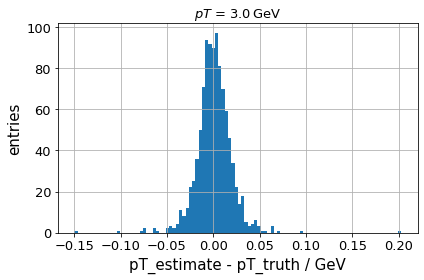

In [28]:
dftest=DVTX['df_p50e95_PT3000MeV']
fig=(dftest['pt_estimate']-dftest["pt_truth"]).hist(bins=100)
plt.ylabel(r'entries', fontsize=15)
#ax.set_yscale('log')
plt.xlabel('pT_estimate - pT_truth / GeV', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(r'$pT$ = '+str(round(dftest['pt_truth'].mean(), 2))+'$\,$GeV', fontsize=13)
plt.tight_layout()
plt.savefig('pt_subVTX.pdf')

In [29]:
momenta = ['300', '350', '400', '500', '600', '700', '800', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
nummom = len(momenta)

In [30]:
def EffRes(eff):
    DEVTX = {}
    pts = np.zeros(shape=(numpitch, nummom))
    ptres = np.zeros(shape=(numpitch, nummom))
    reserr = np.zeros(shape=(numpitch, nummom))

    ip = 0   
    for p in pitches:
        im = 0
        for m in momenta:
            ptmean=0
            resmean=0
            errmean=0
            
            df = DVTX['df_{0}'.format('p'+p+'e'+eff+'_PT'+m+'MeV')] 
            
            ptmean = df['pt_truth'].mean()
            pts[ip][im] = ptmean
            
            #resmean = df['pt_sub'].std()/ptmean
            resmean, errmean = getRes(df['pt_sub']/ptmean)
            ptres[ip][im] = resmean
            
            #errmean = df['pt_sub'].sem()/ptmean
            #errmean = percentile(df['pt_sub'], ptmean)/ptmean
            reserr[ip][im] = errmean
            #print(ptmean, resmean, errmean)
            im = im+1
            
        DEVTX["df_{0}".format('p'+p)] = pd.DataFrame({'pts': pts[ip], 'res': ptres[ip], 'std': reserr[ip]})
        ip = ip+1
    
    return DEVTX

#D_E50 = EffRes('50')
DVTX_E95 = EffRes('95')
#D_E100 = EffRes('100')
DVTX_E95['df_p50']

,pts,res,std
0,0.30,0.004449,0.000060
1,0.35,0.004192,0.000073
2,0.40,0.004123,0.000060
3,0.50,0.004110,0.000053
4,0.60,0.004009,0.000059
5,0.70,0.003824,0.000065
6,0.80,0.004227,0.000065
7,1.00,0.004323,0.000051
8,1.50,0.004416,0.000043
9,2.00,0.004716,0.000042


In [31]:
DVTX_E95

{'df_p50':      pts       res       std
 0   0.30  0.004449  0.000060
 1   0.35  0.004192  0.000073
 2   0.40  0.004123  0.000060
 3   0.50  0.004110  0.000053
 4   0.60  0.004009  0.000059
 5   0.70  0.003824  0.000065
 6   0.80  0.004227  0.000065
 7   1.00  0.004323  0.000051
 8   1.50  0.004416  0.000043
 9   2.00  0.004716  0.000042
 10  2.50  0.004915  0.000074
 11  3.00  0.004893  0.000055
 12  3.50  0.005404  0.000092
 13  4.00  0.005510  0.000080}

In [32]:
D_E95

{'df_p50':    pts       res       std
 0  0.4  0.004158  0.000051
 1  0.5  0.004145  0.000048
 2  0.6  0.003991  0.000062
 3  0.7  0.003815  0.000054
 4  1.0  0.004007  0.000055
 5  2.0  0.004500  0.000050
 6  3.0  0.005577  0.000063
 7  4.0  0.006407  0.000100,
 'df_p200':    pts       res       std
 0  0.4  0.004189  0.000044
 1  0.5  0.004128  0.000051
 2  0.6  0.003989  0.000051
 3  0.7  0.003908  0.000043
 4  1.0  0.004010  0.000056
 5  2.0  0.004552  0.000054
 6  3.0  0.005782  0.000122
 7  4.0  0.006415  0.000109,
 'df_p1000':    pts       res       std
 0  0.4  0.004265  0.000057
 1  0.5  0.004228  0.000059
 2  0.6  0.004151  0.000058
 3  0.7  0.004027  0.000051
 4  1.0  0.004375  0.000062
 5  2.0  0.004841  0.000070
 6  3.0  0.006597  0.000096
 7  4.0  0.007816  0.000068}

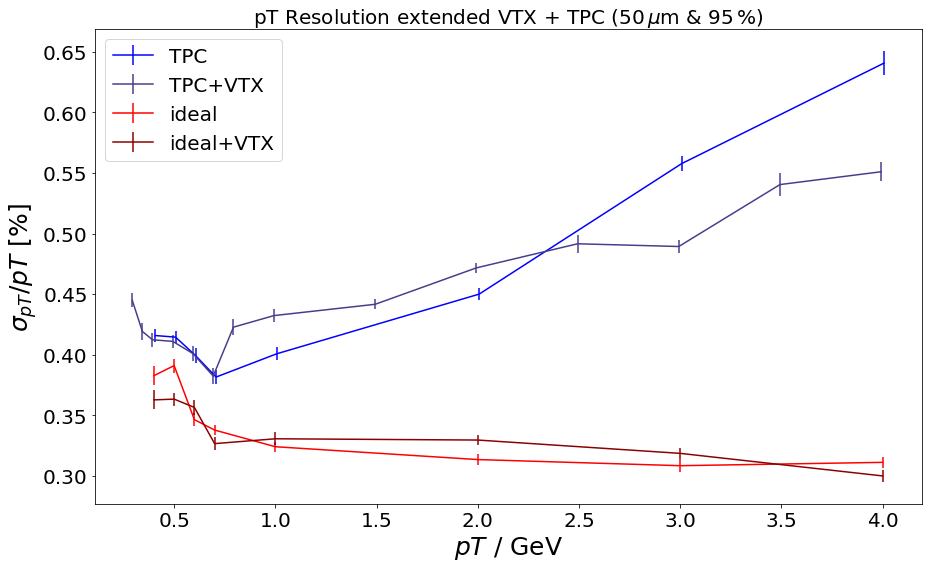

In [374]:
def PlotPT1000VTX(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    df1 = data['df_p50']
    df2 = D_E95['df_p50']
    #df3 = data['df_p1000']
    
    #plt.errorbar(x=df3['pts'], y=df3['res']*100, label='1000$\,\mu$m', markersize=mz, color='deepskyblue', yerr=df3['std']*100)
    plt.errorbar(x=df2['pts']+0.007, y=df2['res']*100, label='TPC', markersize=mz, color='blue', yerr=df2['std']*100)
    plt.errorbar(x=df1['pts']-0.007, y=df1['res']*100, label='TPC+VTX', markersize=mz, color='darkslateblue', yerr=df1['std']*100)
    
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    plt.errorbar(x=D_IVTX['pts'], y=D_IVTX['res']*100, markersize=mz, label='ideal+VTX', color='darkred', yerr=D_IVTX['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel('$pT$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    plt.title(r'pT Resolution extended VTX + TPC ($50\,\mu$m & $95\,\%$)', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_VTXtended_Christian_Fit_TPC_VTXideal.pdf')

PlotPT1000VTX(DVTX_E95)

# CDC

In [179]:
def openfile(filename):
    file = uproot.open(filename)
    pretree = file['pr_tree']
    tree = pretree['pr_tree']
    res = tree["pt_resolution"].array()
    pt =  tree["pt_truth"].array()
    pte = tree["pt_estimate"].array()
    df = pd.DataFrame({'pt_resolution': res, 'pt_truth': pt, 'pt_estimate':pte})
    df['pt_sub'] = df['pt_estimate']-df['pt_truth']
    df = df[abs(df['pt_sub'])<0.2]
    df = df.dropna()
    df = df.reset_index(drop=True)
    #df = df[df['pt_resolution'] <= 0.05]
    file.close()
    
    return df

In [180]:
DCDC = {} 

pitches = ['50']
numpitch = len(pitches)

efficiencies = ['95']
numeff = len(efficiencies)

#momenta = ['200', '300', '400', '500', '600', '700', '800', '1000', '2000', '3000', '4000']
momenta = ['300', '400', '500', '600', '700', '800', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
nummom = len(momenta)

#for p in pitches:
    #for e in efficiencies:
        #for m in momenta:
            #DVTX["df_{0}".format('p'+p+'e'+e+'_PT'+m+'MeV')] = openfile('VTXtended/Muon/1000/TPCSimulationsAndreas_v2/Pitch'+p+'_SEE'+e+'_PT'+m+'MeV.root')
            #print('p'+p+'e'+e+'/p'+p+'e'+e+'_PT'+m+'MeV.root')

for pe in ['only', 'VTX', 'VXD']:
    for m in momenta:
        DCDC["df_{0}".format(pe+'_PT'+m+'MeV')] = openfile('CDCSimulationsAndreas/CDC'+pe+'_PT'+m+'MeV.root')


DCDC

{'df_only_PT300MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0     4.458878e-06       0.3     0.299092 -0.000908
 1     2.450072e-06       0.3     0.300328  0.000328
 2     2.799195e-06       0.3     0.299625 -0.000375
 3     5.662652e-06       0.3     0.299482 -0.000518
 4     2.773030e-06       0.3     0.299370 -0.000630
 ..             ...       ...          ...       ...
 968   9.424233e-07       0.3     0.300531  0.000531
 969   6.746364e-06       0.3     0.300534  0.000534
 970   4.718263e-06       0.3     0.298618 -0.001382
 971   7.114012e-06       0.3     0.300993  0.000993
 972   1.880015e-06       0.3     0.300257  0.000257
 
 [973 rows x 4 columns],
 'df_only_PT400MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0         0.000003       0.4     0.398976 -0.001024
 1         0.000002       0.4     0.401198  0.001198
 2         0.000002       0.4     0.398915 -0.001085
 3         0.000004       0.4     0.398247 -0.001753
 4         0.000002       0.4   

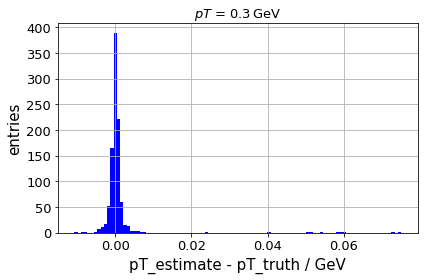

In [181]:
dftest=DCDC['df_only_PT300MeV']
fig=(dftest['pt_estimate']-dftest["pt_truth"]).hist(bins=100)
plt.ylabel(r'entries', fontsize=15)
#ax.set_yscale('log')
plt.xlabel('pT_estimate - pT_truth / GeV', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(r'$pT$ = '+str(round(dftest['pt_truth'].mean(), 2))+'$\,$GeV', fontsize=13)
plt.tight_layout()
plt.savefig('pt_subCDC.pdf')

In [182]:
def IdealResCDC(ideal):
    DI = {}
    pts = np.zeros(shape=(nummom))
    ptres = np.zeros(shape=(nummom))
    reserr = np.zeros(shape=(nummom))

    
    im = 0
    for m in momenta:
        ptmean=0
        resmean=0
        errmean=0
            
        df = DCDC['df_{0}'.format(ideal+'_PT'+m+'MeV')] 
        #print(ideal+'_PT'+m+'MeV')
            
        ptmean = df['pt_truth'].mean()
        pts[im] = ptmean
            
        #resmean = df['pt_sub'].std()/ptmean
        resmean, errmean = getRes(df['pt_sub']/ptmean)
        ptres[im] = resmean
            
        #errmean = df['pt_sub'].sem()/ptmean
        reserr[im] = errmean
        #print(ptmean, resmean, errmean)
        im = im+1
            
    DI = pd.DataFrame({'pts': pts, 'res': ptres, 'std': reserr})
    
    return DI

D_CDConly = IdealResCDC('only')
D_CDCVTX = IdealResCDC('VTX')
D_CDCVXD = IdealResCDC('VXD')
D_CDCVXD

,pts,res,std
0,0.3,0.004842,0.000090
1,0.4,0.003953,0.000083
2,0.5,0.003507,0.000065
3,0.6,0.003145,0.000058
4,0.7,0.003143,0.000039
5,0.8,0.003254,0.000055
6,1.0,0.002905,0.000050
7,1.5,0.003532,0.000037
8,2.0,0.004163,0.000059
9,2.5,0.005335,0.000061


In [183]:
D_CDConly

,pts,res,std
0,0.3,0.002867,0.000042
1,0.4,0.002604,0.000044
2,0.5,0.002416,0.000035
3,0.6,0.002500,0.000048
4,0.7,0.002666,0.000032
5,0.8,0.002646,0.000039
6,1.0,0.002772,0.000034
7,1.5,0.003334,0.000046
8,2.0,0.004086,0.000043
9,2.5,0.004876,0.000054


In [184]:
DVTX_E95

{'df_p50':      pts       res       std
 0   0.30  0.004449  0.000060
 1   0.35  0.004192  0.000073
 2   0.40  0.004123  0.000060
 3   0.50  0.004110  0.000053
 4   0.60  0.004009  0.000059
 5   0.70  0.003824  0.000065
 6   0.80  0.004227  0.000065
 7   1.00  0.004323  0.000051
 8   1.50  0.004416  0.000043
 9   2.00  0.004716  0.000042
 10  2.50  0.004915  0.000074
 11  3.00  0.004893  0.000055
 12  3.50  0.005404  0.000092
 13  4.00  0.005510  0.000080}

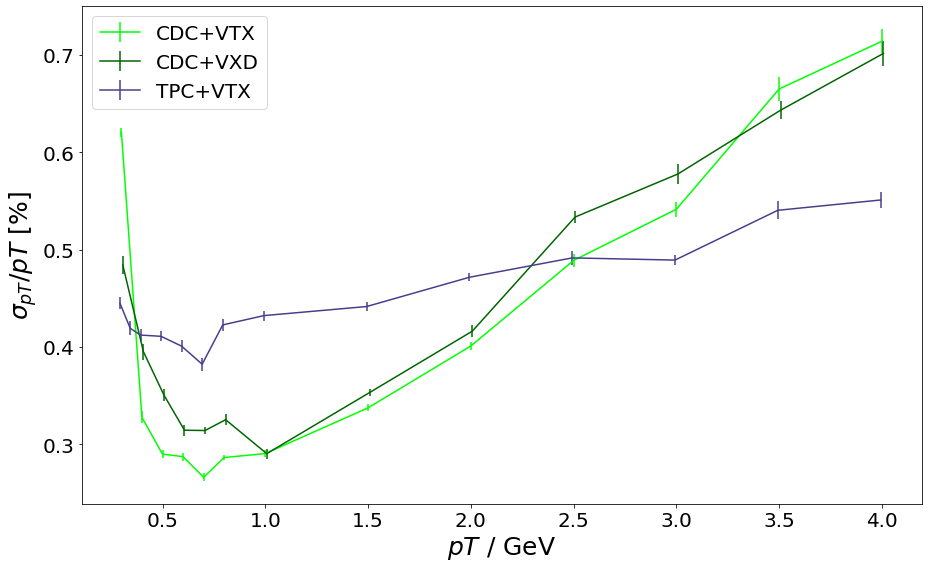

In [185]:
def PlotPTCDC():
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    df1 = DVTX_E95['df_p50']
    #df1 = D_CDConly
    df2 = D_CDCVXD
    df3 = D_CDCVTX
    
    plt.errorbar(x=df3['pts'], y=df3['res']*100, label='CDC+VTX', markersize=mz, color='lime', yerr=df3['std']*100)
    plt.errorbar(x=df2['pts']+0.007, y=df2['res']*100, label='CDC+VXD', markersize=mz, color='darkgreen', yerr=df2['std']*100)
    plt.errorbar(x=df1['pts']-0.007, y=df1['res']*100, label='TPC+VTX', markersize=mz, color='darkslateblue', yerr=df1['std']*100)
    
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    #plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel('$pT$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    #plt.title('pT Resolution of CDC with different inner detectors', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_CDCVXD_TPCVTX.pdf')

PlotPTCDC()

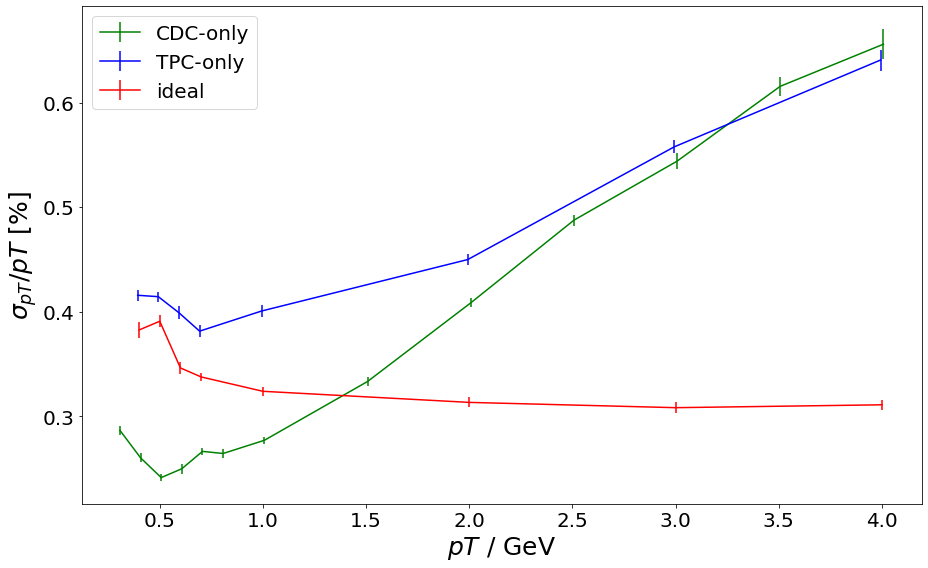

In [41]:
def PlotPTCDConly():
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    df1 = D_E95['df_p50']
    #df1 = D_CDConly
    df2 = D_CDConly
    #df3 = D_CDCVTX
    
    #plt.errorbar(x=df3['pts'], y=df3['res']*100, label='CDC only', markersize=mz, color='deepskyblue', yerr=df3['std']*100)
    plt.errorbar(x=df2['pts']+0.007, y=df2['res']*100, label='CDC-only', markersize=mz, color='green', yerr=df2['std']*100)
    plt.errorbar(x=df1['pts']-0.007, y=df1['res']*100, label='TPC-only', markersize=mz, color='blue', yerr=df1['std']*100)
    
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel('$pT$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    #plt.title('pT Resolution of CDC with different inner detectors', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_CDConly_TPConly.pdf')
    
PlotPTCDConly()

# No VTX

In [42]:
DNOVTX = {} 

pitches = ['50']
numpitch = len(pitches)

efficiencies = ['95']
numeff = len(efficiencies)

momenta = ['400', '500', '600', '700', '1000', '2000', '3000', '4000']
momenta = ['300', '400', '500', '600', '700', '800', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
nummom = len(momenta)

for p in pitches:
    for e in efficiencies:
        for m in momenta:
            DNOVTX["df_{0}".format('p'+p+'e'+e+'_PT'+m+'MeV')] = openfile('VTXtended/Muon/1000/TPCSimulationsAndreas_v3_noVTX/Pitch'+p+'_SEE'+e+'_PT'+m+'MeV.root')
            #print('p'+p+'e'+e+'/p'+p+'e'+e+'_PT'+m+'MeV.root')

#for pe in ['ideal', 'idealDiff']:
    #for m in momenta:
        #DVTX["df_{0}".format(pe+'_PT'+m+'MeV')] = openfile(pe+'/'+pe+'_PT'+m+'MeV.root')


DNOVTX

{'df_p50e95_PT300MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0         0.000017       0.3     0.298637 -0.001363
 1         0.000012       0.3     0.300884  0.000884
 2         0.000007       0.3     0.300316  0.000316
 3         0.000016       0.3     0.302749  0.002749
 4         0.000016       0.3     0.298711 -0.001289
 ..             ...       ...          ...       ...
 967       0.000005       0.3     0.301370  0.001370
 968       0.000039       0.3     0.299083 -0.000917
 969       0.000012       0.3     0.299728 -0.000272
 970       0.000026       0.3     0.298556 -0.001444
 971       0.000010       0.3     0.301217  0.001217
 
 [972 rows x 4 columns],
 'df_p50e95_PT400MeV':      pt_resolution  pt_truth  pt_estimate    pt_sub
 0         0.000016       0.4     0.398862 -0.001138
 1         0.000012       0.4     0.399129 -0.000871
 2         0.000006       0.4     0.401364  0.001364
 3         0.000012       0.4     0.398687 -0.001313
 4         0.000016       0.

## pT und theta dist

In [366]:
def opendist(filename):
    file = uproot.open(filename)
    tree = file['MCPs']
    pt = tree["pt"].array()
    theta = tree["theta"].array()
    df = pd.DataFrame({'pt': pt, 'theta': theta})
    #df = df[df['pt_resolution'] <= 0.1]
    file.close()
    
    return df

In [347]:
dfY4S = pd.read_pickle("pTtheta/Y4Smomenta.pkl")
dfY4S.columns = ['px', 'py', 'pz']

In [361]:
dftest = uproot.open('pTtheta/mctrackparameters.root')
dftest.keys()

['MCPs;1']

In [363]:
dfMCPs = dftest['MCPs']
dfMCPs.keys()

['pt', 'theta']

In [365]:
pt = dfMCPs['pt'].array()
dfnew = pd.DataFrame({'px': pt})
dfnew

,px
0,0.401171
1,0.249529
2,0.189667
3,0.210539
4,0.151914
...,...
12072951,0.817812
12072952,0.066605
12072953,0.535060
12072954,0.137540


In [348]:
dfY4S['pt'] = np.sqrt(dfY4S['px']**2+dfY4S['py']**2)
dfY4S['theta'] = np.degrees(np.arctan2(dfY4S['pt'], dfY4S['pz']))
dfY4S

,px,py,pz,pt,theta
0,0.456704,-0.000000,3.002304,0.456704,8.649402
1,0.354875,0.306391,1.570580,0.468841,16.621122
2,0.101829,-0.306391,1.431723,0.322869,12.708234
3,1.748204,0.904873,0.758578,1.968505,68.925453
4,-1.393328,-0.598482,0.812002,1.516425,61.832218
...,...,...,...,...,...
44756004,-0.170001,0.388979,0.306767,0.424505,54.146416
44756005,0.214352,-0.269736,-0.113541,0.344535,108.239624
44756006,0.033624,-0.087097,-0.109758,0.093362,139.614990
44756007,-0.370343,0.285324,0.207438,0.467508,66.072670


(array([3.4548801e+07, 7.3005910e+06, 2.2625000e+06, 6.0051300e+05,
        4.3329000e+04, 9.8000000e+01, 5.1000000e+01, 5.1000000e+01,
        4.2000000e+01, 3.3000000e+01]),
 array([4.3396103e-11, 5.5169755e-01, 1.1033951e+00, 1.6550926e+00,
        2.2067902e+00, 2.7584877e+00, 3.3101852e+00, 3.8618827e+00,
        4.4135804e+00, 4.9652777e+00, 5.5169754e+00], dtype=float32),
 <BarContainer object of 10 artists>)

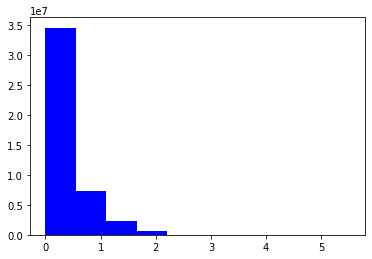

In [349]:
plt.hist(dfY4S['pt'])

(array([  54600.,  168531.,  265177.,  312651., 1350565.,  400205.,
         456146.,  516796.,  578780.,  637437.,  668169.,  627077.,
         549195.,  532979.,  555685.,  580696.,  604579.,  625253.,
         644403.,  660738.,  677265.,  692334.,  702597.,  713661.,
         722811.,  729384.,  733281.,  738198.,  739917.,  742347.,
         741043.,  739088.,  735813.,  731527.,  727602.,  721346.,
         715321.,  707030.,  697273.,  689326.,  680229.,  669773.,
         658186.,  649390.,  636438.,  625607.,  613534.,  599313.,
         588087.,  574739.,  562286.,  549788.,  536471.,  522316.,
         508822.,  498166.,  483380.,  470108.,  457011.,  443261.,
         431378.,  418638.,  405314.,  392994.,  379154.,  367885.,
         354878.,  342148.,  329830.,  319286.,  307332.,  295197.,
         282945.,  271987.,  260454.,  248241.,  238157.,  226171.,
         215229.,  204490.,  193833.,  182878.,  172580.,  162515.,
         151857.,  141133.,  131190.,  120954., 

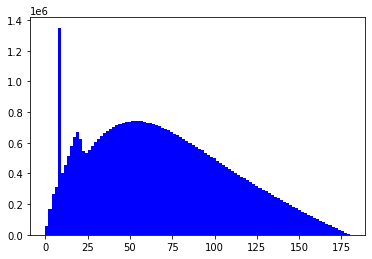

In [351]:
plt.hist(dfY4S['theta'], bins=100)

In [368]:
dfY4S = opendist('pTtheta/mctrackparameters.root')
dfY4S

,pt,theta
0,0.401171,29.635713
1,0.249529,112.835252
2,0.189667,71.491663
3,0.210539,154.673158
4,0.151914,69.763314
...,...,...
12072951,0.817812,58.224922
12072952,0.066605,41.364292
12072953,0.535060,91.610173
12072954,0.137540,49.659864


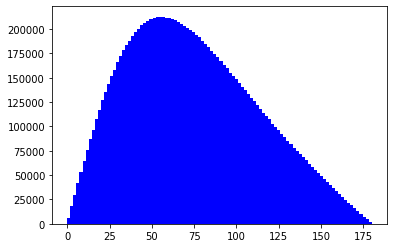

In [372]:
_ =plt.hist(dfY4S['theta'], bins=100)

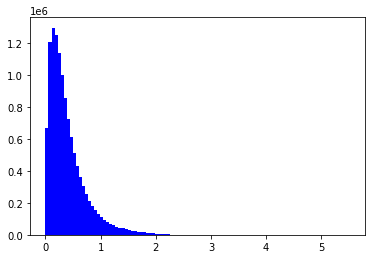

In [373]:
_ =plt.hist(dfY4S['pt'], bins=100)

In [378]:
dfcut = dfY4S[(dfY4S['theta']>17) & (dfY4S['theta']<150)]
dfcut

,pt,theta
0,0.401171,29.635713
1,0.249529,112.835252
2,0.189667,71.491663
4,0.151914,69.763314
5,0.297747,94.147111
...,...,...
12072951,0.817812,58.224922
12072952,0.066605,41.364292
12072953,0.535060,91.610173
12072954,0.137540,49.659864


# THETA

In [352]:
def openfile(filename):
    file = uproot.open(filename)
    pretree = file['pr_tree']
    tree = pretree['pr_tree']
    #res = tree["pt_resolution"].array()
    pt =  tree["pt_truth"].array()
    pte = tree["pt_estimate"].array()
    df = pd.DataFrame({'pt_truth': pt, 'pt_estimate':pte})
    df['pt_sub'] = df['pt_estimate']-df['pt_truth']
    #df = df[abs(df['pt_sub'])<0.2]
    df = df.dropna()
    df = df.reset_index(drop=True)
    #df = df[df['pt_resolution'] <= 0.05]
    file.close()
    
    return df

In [353]:
DT = {} 

thetas = ['30', '45', '60', '75', '90', '105', '120', '135']
numthetas = len(thetas)


momenta = ['300', '400', '500', '600', '700', '800', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
nummom = len(momenta)

for t in thetas:
    for m in momenta:
        DT["df_{0}".format('pT'+m+'theta'+t)] = openfile('pTtheta/VTX/pT'+m+'theta'+t+'.root')
            #print('p'+p+'e'+e+'/p'+p+'e'+e+'_PT'+m+'MeV.root')


DT

{'df_pT300theta30':      pt_truth  pt_estimate    pt_sub
 0         0.3     0.298449 -0.001551
 1         0.3     0.297779 -0.002221
 2         0.3     0.303132  0.003132
 3         0.3     0.299166 -0.000834
 4         0.3     0.298984 -0.001016
 ..        ...          ...       ...
 994       0.3     0.302331  0.002331
 995       0.3     0.295459 -0.004541
 996       0.3     0.303143  0.003143
 997       0.3     0.288394 -0.011606
 998       0.3     0.302559  0.002559
 
 [999 rows x 3 columns],
 'df_pT400theta30':      pt_truth  pt_estimate    pt_sub
 0         0.4     0.400146  0.000146
 1         0.4     0.399934 -0.000066
 2         0.4     0.400555  0.000555
 3         0.4     0.402458  0.002458
 4         0.4     0.400412  0.000412
 ..        ...          ...       ...
 993       0.4     0.401018  0.001018
 994       0.4     0.399199 -0.000801
 995       0.4     0.401382  0.001382
 996       0.4     0.388271 -0.011729
 997       0.4     0.394790 -0.005210
 
 [998 rows x 3 column

In [354]:
DTCDC = {} 

thetas = ['30', '45', '60', '75', '90', '105', '120', '135']
numthetas = len(thetas)


momenta = ['300', '400', '500', '600', '700', '800', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
nummom = len(momenta)

for t in thetas:
    for m in momenta:
        DTCDC["df_{0}".format('pT'+m+'theta'+t)] = openfile('pTtheta/CDC/CDCpT'+m+'theta'+t+'.root')
            #print('p'+p+'e'+e+'/p'+p+'e'+e+'_PT'+m+'MeV.root')


DTCDC

{'df_pT300theta30':      pt_truth  pt_estimate    pt_sub
 0         0.3     0.300773  0.000773
 1         0.3     0.294136 -0.005864
 2         0.3     0.299613 -0.000387
 3         0.3     0.299168 -0.000832
 4         0.3     0.287460 -0.012540
 ..        ...          ...       ...
 995       0.3     0.300662  0.000662
 996       0.3     0.298556 -0.001444
 997       0.3     0.292666 -0.007334
 998       0.3     0.290052 -0.009948
 999       0.3     0.298606 -0.001394
 
 [1000 rows x 3 columns],
 'df_pT400theta30':      pt_truth  pt_estimate    pt_sub
 0         0.4     0.401028  0.001028
 1         0.4     0.396266 -0.003734
 2         0.4     0.397300 -0.002700
 3         0.4     0.399588 -0.000412
 4         0.4     0.400842  0.000842
 ..        ...          ...       ...
 995       0.4     0.399575 -0.000425
 996       0.4     0.406521  0.006521
 997       0.4     0.394447 -0.005553
 998       0.4     0.391808 -0.008192
 999       0.4     0.401395  0.001395
 
 [1000 rows x 3 colu

(array([ 4.,  1.,  1.,  3.,  3.,  7.,  3., 11.,  9., 16., 29., 22., 26.,
        36., 42., 39., 55., 50., 58., 38., 50., 58., 51., 47., 56., 48.,
        33., 33., 28., 25., 26., 16., 14., 16., 13., 10.,  5.,  5.,  3.,
         1.,  3.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([-0.46108101, -0.43869218, -0.41630335, -0.39391452, -0.37152569,
        -0.34913686, -0.32674803, -0.3043592 , -0.28197037, -0.25958153,
        -0.2371927 , -0.21480387, -0.19241504, -0.17002621, -0.14763738,
        -0.12524855, -0.10285972, -0.08047089, -0.05808206, -0.03569323,
        -0.0133044 ,  0.00908443,  0.03147326,  0.05386209,  0.07625092,
         0.09863975,  0.12102858,  0.14341741,  0.16580625,  0.18819508,
         0.21058391,  0.23297274,  0.25536157,  0.2777504 ,  0.30013923,
         0.32252806,  0.34491689,  0.36730572,  0.38969455,  0.41208338,
         0.43447221,  0.45686104,  0.47924987,  0.5016387 ,  0.52402753,
         0.54641636,  0.56880519,  0.59119402,  0.61358286,

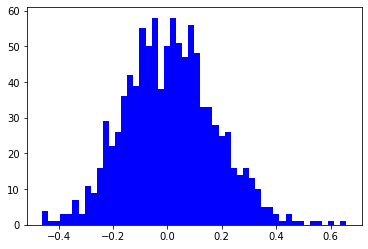

In [357]:
plt.hist(DTCDC['df_pT4000theta135']['pt_sub'], bins=50)

In [226]:
def AverageFrame(df):
    ptr = df['res'].to_numpy()
    std = df['std'].to_numpy()
    meanstd = np.sqrt(sum(std**2))/len(std)
    
    return ptr.mean(), meanstd

In [227]:
def ThetaRes(dic):
    D_THETA = {}
    pts = np.zeros(shape=(numthetas, nummom))
    ptres = np.zeros(shape=(numthetas, nummom))
    reserr = np.zeros(shape=(numthetas, nummom))

    it = 0   
    for t in thetas:
        im = 0
        for m in momenta:
            ptmean=0
            resmean=0
            errmean=0
            
            df = dic['df_{0}'.format('pT'+m+'theta'+t)] 
            
            ptmean = df['pt_truth'].mean()
            pts[it][im] = ptmean
            
            resmean, errmean = getRes(df['pt_sub']/ptmean)
            ptres[it][im] = resmean
            reserr[it][im] = errmean
            
            im = im+1
            
        D_THETA["df_{0}".format('theta'+t)] = pd.DataFrame({'pts': pts[it], 'res': ptres[it], 'std': reserr[it]})
        it = it+1
    
    return D_THETA

DT_THETA = ThetaRes(DT)
DTCDC_THETA = ThetaRes(DTCDC)
DTCDC_THETA

{'df_theta30':     pts       res       std
 0   0.3  0.011107  0.000114
 1   0.4  0.008980  0.000143
 2   0.5  0.006919  0.000113
 3   0.6  0.006384  0.000128
 4   0.7  0.005757  0.000099
 5   0.8  0.005241  0.000113
 6   1.0  0.005063  0.000077
 7   1.5  0.005240  0.000119
 8   2.0  0.006231  0.000134
 9   2.5  0.007022  0.000179
 10  3.0  0.008603  0.000198
 11  3.5  0.010130  0.000253
 12  4.0  0.011486  0.000275,
 'df_theta45':     pts       res       std
 0   0.3  0.008056  0.000139
 1   0.4  0.006616  0.000071
 2   0.5  0.005353  0.000080
 3   0.6  0.004437  0.000064
 4   0.7  0.004130  0.000062
 5   0.8  0.003834  0.000069
 6   1.0  0.003464  0.000069
 7   1.5  0.003612  0.000048
 8   2.0  0.003926  0.000092
 9   2.5  0.004729  0.000116
 10  3.0  0.005179  0.000058
 11  3.5  0.005522  0.000107
 12  4.0  0.006198  0.000102,
 'df_theta60':     pts       res       std
 0   0.3  0.005446  0.000051
 1   0.4  0.004497  0.000088
 2   0.5  0.003749  0.000071
 3   0.6  0.003211  0.000046

In [228]:
def CollapseTheta(dic):
    thts = np.zeros(shape=(numthetas))
    ptres = np.zeros(shape=(numthetas))
    reserr = np.zeros(shape=(numthetas))
    
    it = 0
    for t in thetas:
        df = dic['df_{0}'.format('theta'+t)]
        res, std = AverageFrame(df)
        
        thts[it] = int(t)
        ptres[it] = res
        reserr[it] = std
        
        it = it+1
    
    retdf = pd.DataFrame({'theta': thts, 'res': ptres, 'std': reserr})
    
    return retdf

DT_THETACOL = CollapseTheta(DT_THETA)
DTCDC_THETACOL = CollapseTheta(DTCDC_THETA)
DTCDC_THETACOL

,theta,res,std
0,30.0,0.007551,0.000044
1,45.0,0.005004,0.000024
2,60.0,0.004275,0.000026
3,75.0,0.003800,0.000022
4,90.0,0.003537,0.000021
5,105.0,0.003745,0.000026
6,120.0,0.004340,0.000025
7,135.0,0.016776,0.000199


In [229]:
DTCDC_THETA['df_theta135']

,pts,res,std
0,0.3,0.009730,0.000187
1,0.4,0.008336,0.000182
2,0.5,0.008175,0.000140
3,0.6,0.008171,0.000125
4,0.7,0.008506,0.000195
5,0.8,0.009082,0.000195
6,1.0,0.011015,0.000271
7,1.5,0.015276,0.000403
8,2.0,0.020608,0.000475
9,2.5,0.026589,0.000848


In [230]:
def CollapseThetaCDClow(dic):
    thts = np.zeros(shape=(numthetas))
    ptres = np.zeros(shape=(numthetas))
    reserr = np.zeros(shape=(numthetas))
    
    it = 0
    for t in thetas:
        df = dic['df_{0}'.format('theta'+t)]
        df = df[df['pts']<0.9]
        res, std = AverageFrame(df)
        
        thts[it] = int(t)
        ptres[it] = res
        reserr[it] = std
        
        it = it+1
    
    retdf = pd.DataFrame({'theta': thts, 'res': ptres, 'std': reserr})
    
    return retdf

DTCDC_THETACOLLOW = CollapseThetaCDClow(DTCDC_THETA)
DTCDC_THETACOLLOW

,theta,res,std
0,30.0,0.007398,0.000049
1,45.0,0.005404,0.000035
2,60.0,0.003901,0.000025
3,75.0,0.002891,0.000015
4,90.0,0.002315,0.000015
5,105.0,0.002796,0.000018
6,120.0,0.004040,0.000028
7,135.0,0.008667,0.000071


In [231]:
DTCDC_THETACOL

,theta,res,std
0,30.0,0.007551,0.000044
1,45.0,0.005004,0.000024
2,60.0,0.004275,0.000026
3,75.0,0.003800,0.000022
4,90.0,0.003537,0.000021
5,105.0,0.003745,0.000026
6,120.0,0.004340,0.000025
7,135.0,0.016776,0.000199


In [232]:
def PtRes(dic):
    D_PT = {}
    thts = np.zeros(shape=(nummom, numthetas))
    ptres = np.zeros(shape=(nummom, numthetas))
    reserr = np.zeros(shape=(nummom, numthetas))

    im = 0   
    for m in momenta:
        it = 0
        for t in thetas:
            ptmean=0
            resmean=0
            errmean=0
            
            df = dic['df_{0}'.format('pT'+m+'theta'+t)] 
            
            ptmean = df['pt_truth'].mean()
            thts[im][it] = int(t)
            
            resmean, errmean = getRes(df['pt_sub']/ptmean)
            ptres[im][it] = resmean
            reserr[im][it] = errmean
            
            it = it+1
            
        D_PT["df_{0}".format('pT'+m)] = pd.DataFrame({'thts': thts[im], 'res': ptres[im], 'std': reserr[im]})
        im = im+1
    
    return D_PT

DT_PT = PtRes(DT)
DTCDC_PT = PtRes(DTCDC)
DTCDC_PT

{'df_pT300':     thts       res       std
 0   30.0  0.011107  0.000114
 1   45.0  0.008056  0.000139
 2   60.0  0.005446  0.000051
 3   75.0  0.003893  0.000022
 4   90.0  0.002443  0.000050
 5  105.0  0.003625  0.000071
 6  120.0  0.005906  0.000105
 7  135.0  0.009730  0.000187,
 'df_pT400':     thts       res       std
 0   30.0  0.008980  0.000143
 1   45.0  0.006616  0.000071
 2   60.0  0.004497  0.000088
 3   75.0  0.003061  0.000023
 4   90.0  0.002342  0.000038
 5  105.0  0.002891  0.000024
 6  120.0  0.004634  0.000060
 7  135.0  0.008336  0.000182,
 'df_pT500':     thts       res       std
 0   30.0  0.006919  0.000113
 1   45.0  0.005353  0.000080
 2   60.0  0.003749  0.000071
 3   75.0  0.002678  0.000042
 4   90.0  0.002261  0.000046
 5  105.0  0.002800  0.000048
 6  120.0  0.004050  0.000070
 7  135.0  0.008175  0.000140,
 'df_pT600':     thts       res       std
 0   30.0  0.006384  0.000128
 1   45.0  0.004437  0.000064
 2   60.0  0.003211  0.000046
 3   75.0  0.002547

In [233]:
def CollapsePt(dic):
    pts = np.zeros(shape=(nummom))
    ptres = np.zeros(shape=(nummom))
    reserr = np.zeros(shape=(nummom))
    
    im = 0
    for m in momenta:
        df = dic['df_{0}'.format('pT'+m)]
        res, std = AverageFrame(df)
        
        pts[im] = int(m)
        ptres[im] = res
        reserr[im] = std
        
        im = im+1
    
    retdf = pd.DataFrame({'pT': pts, 'res': ptres, 'std': reserr})
    
    return retdf

DT_PTCOL = CollapsePt(DT_PT)
DTCDC_PTCOL = CollapsePt(DTCDC_PT)
DTCDC_PTCOL

,pT,res,std
0,300.0,0.006276,0.000037
1,400.0,0.005170,0.000034
2,500.0,0.004498,0.000029
3,600.0,0.004122,0.000027
4,700.0,0.004023,0.000031
5,800.0,0.003969,0.000032
6,1000.0,0.004131,0.000038
7,1500.0,0.005013,0.000055
8,2000.0,0.006292,0.000066
9,2500.0,0.007604,0.000112


In [234]:
DTCDC_THETACOL

,theta,res,std
0,30.0,0.007551,0.000044
1,45.0,0.005004,0.000024
2,60.0,0.004275,0.000026
3,75.0,0.003800,0.000022
4,90.0,0.003537,0.000021
5,105.0,0.003745,0.000026
6,120.0,0.004340,0.000025
7,135.0,0.016776,0.000199


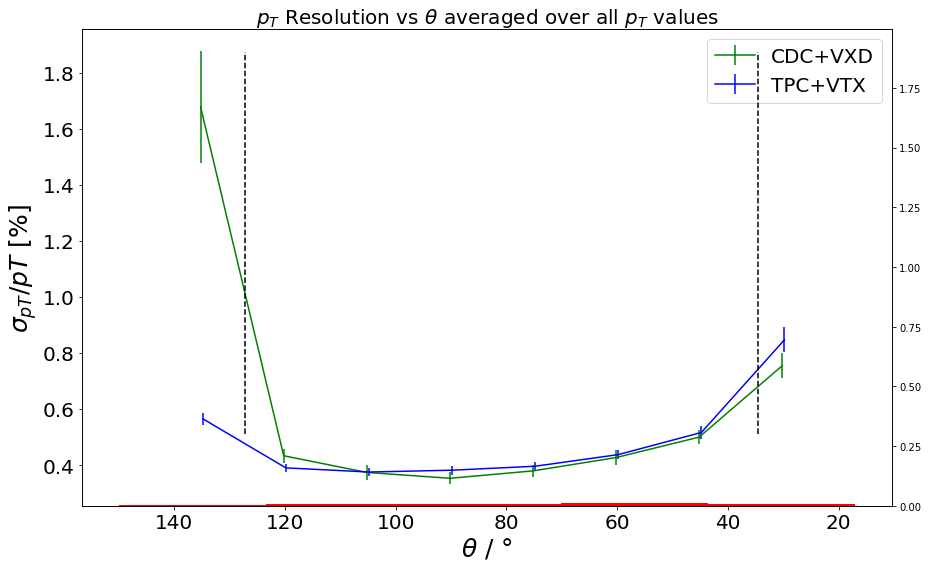

In [386]:
def PlotPTResTHETACOL():
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    df1 = DT_THETACOL
    #df1 = D_CDConly
    df2 = DTCDC_THETACOL
    df3 = DTCDC_THETACOLLOW
    
    #plt.errorbar(x=df3['theta']+0.0, y=df3['res']*100, label='CDC+VXD low', markersize=mz, color='orange', yerr=df3['std']*1000)
    ax.errorbar(x=df2['theta']+0.2, y=df2['res']*100, label='CDC+VXD', markersize=mz, color='green', yerr=df2['std']*1000)
    ax.errorbar(x=df1['theta']-0.2, y=df1['res']*100, label='TPC+VTX', markersize=mz, color='blue', yerr=df1['std']*1000)
    plt.gca().invert_xaxis()
    
    
    plt.vlines(34.64, 0.3, 1.9, ls='--', color='black')
    plt.vlines(127.19, 0.3, 1.9, ls='--', color='black')
    #plt.ylim(0.0, 1.9)
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    #plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel(r'$\theta$ / °', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    ax.legend(fontsize=20)
    plt.title(r'$p_T$ Resolution vs $\theta$ averaged over all $p_T$ values', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    #plt.savefig('pTRes_THETACOL.pdf')
    
PlotPTResTHETACOL()

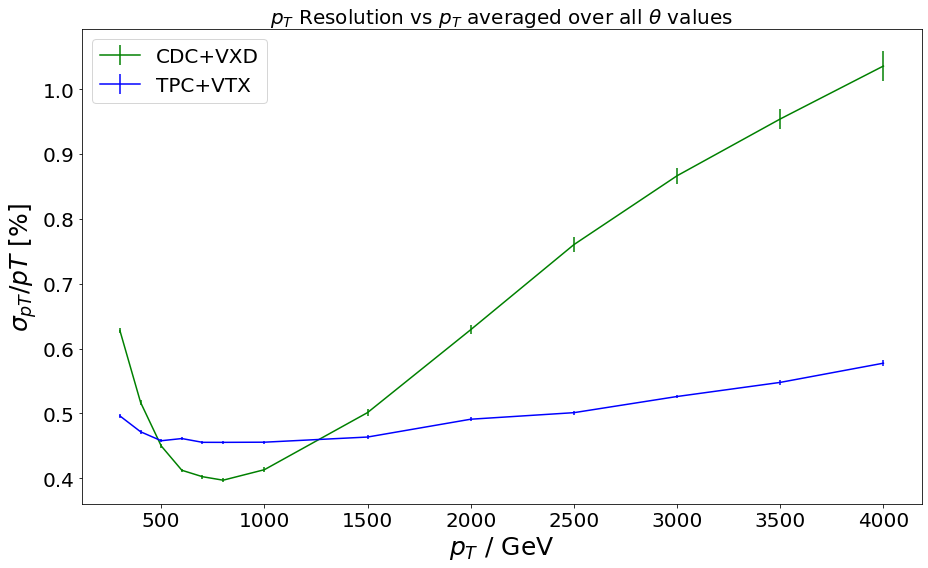

In [268]:
def PlotPTResPTCOL():
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    df1 = DT_PTCOL
    #df1 = D_CDConly
    df2 = DTCDC_PTCOL
    #df3 = D_CDCVTX
    
    #plt.errorbar(x=df3['pts'], y=df3['res']*100, label='CDC only', markersize=mz, color='deepskyblue', yerr=df3['std']*100)
    plt.errorbar(x=df2['pT']+0.007, y=df2['res']*100, label='CDC+VXD', markersize=mz, color='green', yerr=df2['std']*100)
    plt.errorbar(x=df1['pT']-0.007, y=df1['res']*100, label='TPC+VTX', markersize=mz, color='blue', yerr=df1['std']*100)
    
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    #plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel(r'$p_T$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    plt.title(r'$p_T$ Resolution vs $p_T$ averaged over all $\theta$ values', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_PTCOL.pdf')
    
PlotPTResPTCOL()

In [165]:
DT_PT

{'df_pT300':     thts       res       std
 0   30.0  0.008916  0.000167
 1   45.0  0.005276  0.000087
 2   60.0  0.004381  0.000058
 3   75.0  0.003597  0.000044
 4   90.0  0.003415  0.000075
 5  105.0  0.003480  0.000056
 6  120.0  0.004182  0.000076
 7  135.0  0.006436  0.000068,
 'df_pT400':     thts       res       std
 0   30.0  0.008063  0.000143
 1   45.0  0.005249  0.000084
 2   60.0  0.004268  0.000075
 3   75.0  0.003485  0.000036
 4   90.0  0.003433  0.000057
 5  105.0  0.003592  0.000037
 6  120.0  0.003917  0.000053
 7  135.0  0.005726  0.000078,
 'df_pT500':     thts       res       std
 0   30.0  0.007997  0.000127
 1   45.0  0.004838  0.000065
 2   60.0  0.004096  0.000054
 3   75.0  0.003704  0.000049
 4   90.0  0.003408  0.000038
 5  105.0  0.003554  0.000042
 6  120.0  0.003546  0.000049
 7  135.0  0.005482  0.000068,
 'df_pT600':     thts       res       std
 0   30.0  0.008142  0.000191
 1   45.0  0.004959  0.000073
 2   60.0  0.003996  0.000058
 3   75.0  0.003718

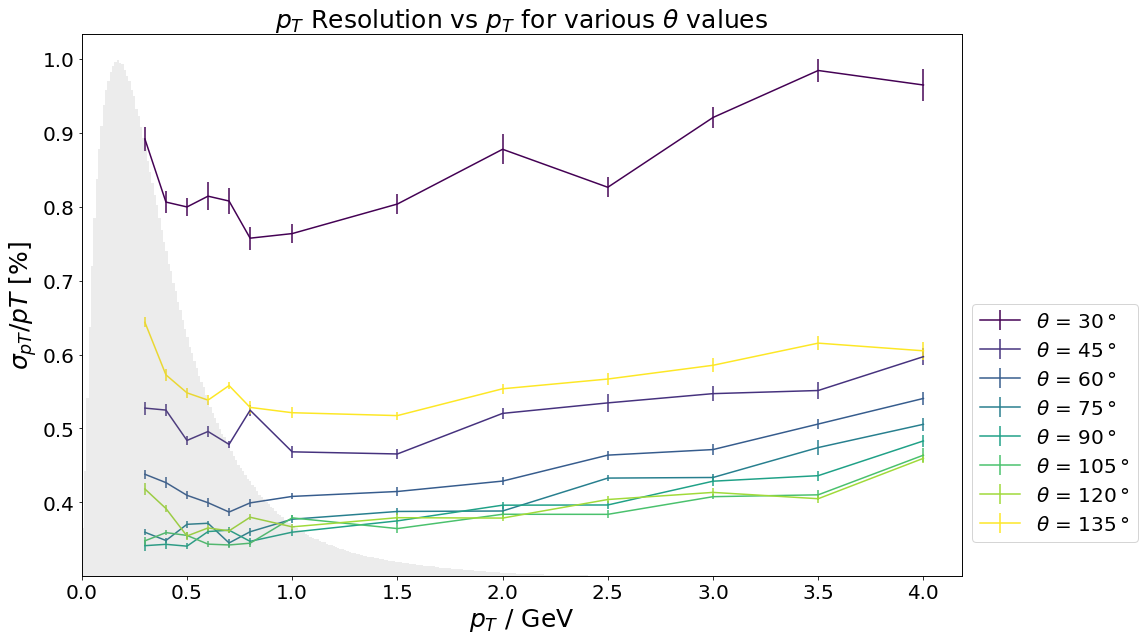

In [415]:
def PlotPTResTHETA(dic):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 9)
    mz = 0
    fmt='+'
    colormap = blue_tableau
    
    it = 0
    #thetas = [30, 45, 60, 75, 90, 105, 120, 135]
    N = len(thetas)
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))
    for t in thetas:
        df = dic['df_theta'+t]
        #colors = [30.0/135, 45.0/135, 60.0/135, 75.0/135, 90.0/135, 105.0/135, 120.0/135, 135.0/135]
        ax.errorbar(x=df['pts'], y=df['res']*100, label=r'$\theta$ = '+t+r'$\,$°', markersize=mz, yerr=df['std']*100)
        it = it+1
    
    
     
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel(r'$p_T$ / GeV', fontsize=25)
    xlim = ax.get_xlim()
    ax.set_xlim(0, xlim[1])
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    ax.legend(fontsize=20, bbox_to_anchor=(1.0, 0.52))
    ax2 = ax.twinx() 
    ax2.hist(dfcut['pt'], density=True, color='gray', alpha=0.15, bins=500)
    ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)
    #ax2.set_ylim(0.0, 1.4)
    
    
    plt.title(r'$p_T$ Resolution vs $p_T$ for various $\theta$ values', fontsize=25)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_THETA_dist.pdf')
    
PlotPTResTHETA(DT_THETA)

In [252]:
DTCDC_THETACOLLOW*100

,theta,res,std
0,3000.0,0.739772,0.004867
1,4500.0,0.540439,0.003476
2,6000.0,0.390128,0.002512
3,7500.0,0.289125,0.001469
4,9000.0,0.231455,0.001484
5,10500.0,0.279577,0.001830
6,12000.0,0.403991,0.002837
7,13500.0,0.866652,0.007050


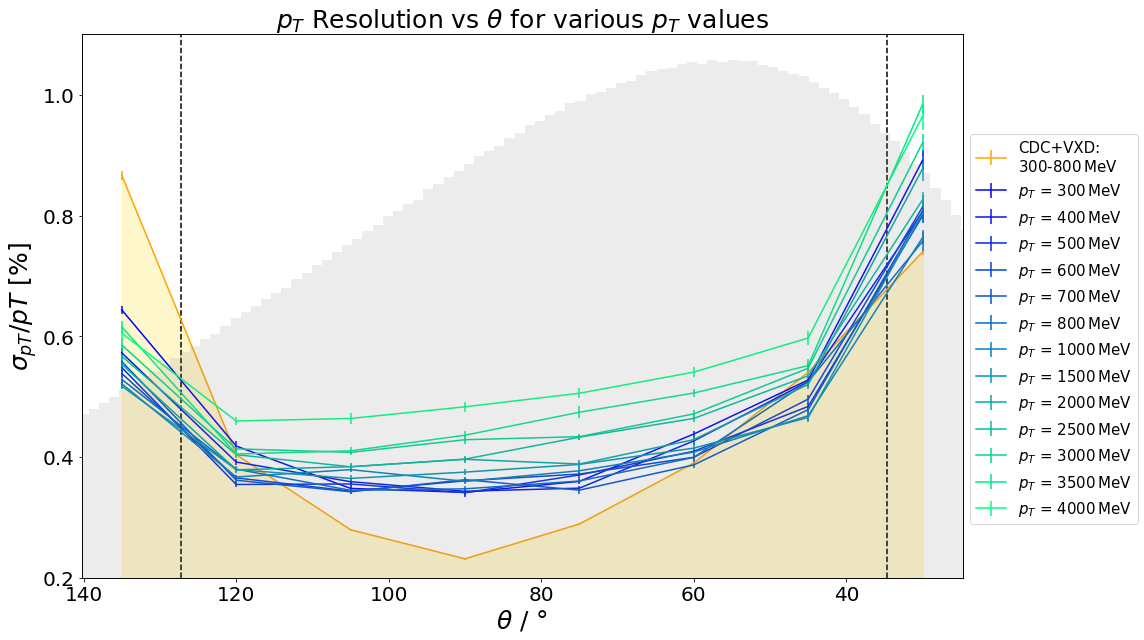

In [438]:
def PlotPTResPT(dic, reduced=False):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 9)
    mz = 0
    fmt='+'
    
    plt.errorbar(x=DTCDC_THETACOLLOW['theta'], y=DTCDC_THETACOLLOW['res']*100, label='CDC+VXD:\n300-800$\,$MeV', markersize=mz, yerr=DTCDC_THETACOLLOW['std']*100, color='orange')
    plt.fill_between(DTCDC_THETACOLLOW['theta'], DTCDC_THETACOLLOW['res']*100, color='gold', alpha=0.2)
    momenta = ['300', '400', '500', '600', '700', '800', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
    if reduced:
        momenta = ['300', '400', '500', '4000']
    
    N = len(momenta)
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.winter(np.linspace(0,1,N)))
    for m in momenta:
        df = dic['df_pT'+m]
        ax.errorbar(x=df['thts'], y=df['res']*100, label=r'$p_T$ = '+m+r'$\,$MeV', markersize=mz, yerr=df['std']*100)
        
    
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    xlim = ax.get_xlim()
    ax.set_xlim(xlim)
    
    plt.axvline(x=34.64, ymin=0.0, ymax = 1.0, color='k', ls='--')
    plt.axvline(x=127.19, ymin=0.0, ymax = 1.0, color='k', ls='--')

    ax.set_xlabel(r'$\theta$ / °', fontsize=25)
    ax.set_ylim(0.2, 1.1)
    plt.gca().invert_xaxis()
    ax.tick_params(labelsize=20)
    
    ax.legend(fontsize=15, bbox_to_anchor=(1.0, 0.83))
    
    ax2 = ax.twinx() 
    ax2.hist(dfcut['theta'][(dfcut['theta']<=150) & (dfcut['theta']>=15)], density=True, color='gray', alpha=0.15, bins=100)
    ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)
    
    
    plt.title(r'$p_T$ Resolution vs $\theta$ for various $p_T$ values', fontsize=25)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    if reduced:
        plt.savefig('pTRes_PT_reduced_dist.pdf')
    else:
        plt.savefig('pTRes_PT_dist.pdf')
    
PlotPTResPT(DT_PT)

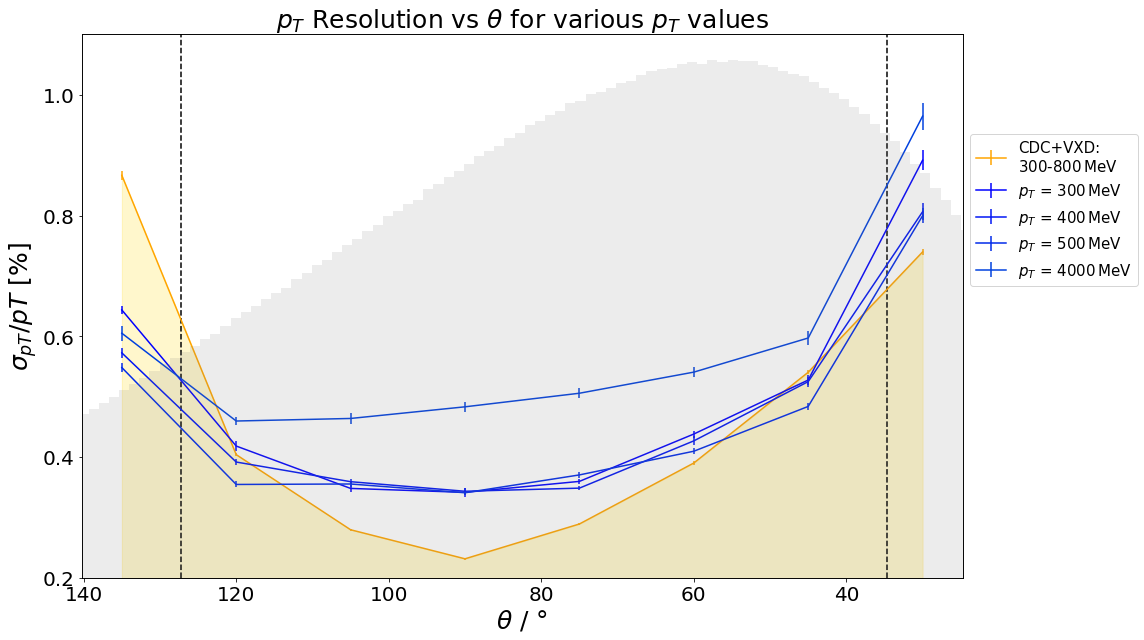

In [439]:
PlotPTResPT(DT_PT, True)

In [89]:
def PlotPTResPTCOL():
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    df1 = DT_PTCOL
    #df1 = D_CDConly
    df2 = DTCDC_PTCOL
    #df3 = D_CDCVTX
    
    #plt.errorbar(x=df3['pts'], y=df3['res']*100, label='CDC only', markersize=mz, color='deepskyblue', yerr=df3['std']*100)
    plt.errorbar(x=df2['pT']+0.007, y=df2['ptres']*100, label='CDC+VXD', markersize=mz, color='darkgreen', yerr=df2['std']*100)
    plt.errorbar(x=df1['pT']-0.007, y=df1['ptres']*100, label='TPC+VTX', markersize=mz, color='darkslateblue', yerr=df1['std']*100)
    
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    #plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel(r'$p_T$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    plt.title(r'$p_T$ Resolution vs $p_T$ averaged over all $\theta$ values', fontsize=20)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('pTRes_PTCOL.pdf')

In [287]:
def ChristianPlotsPT(df1, df2, thetaval):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    #df1 = DT_PTCOL
    #df1 = D_CDConly
    #df2 = DTCDC_PTCOL
    #df3 = D_CDCVTX
    
    #plt.errorbar(x=df3['pts'], y=df3['res']*100, label='CDC only', markersize=mz, color='deepskyblue', yerr=df3['std']*100)
    plt.errorbar(x=df2['pts'], y=df2['res']*100, label='CDC+VXD', markersize=mz, color='green', yerr=df2['std']*100)
    plt.errorbar(x=df1['pts'], y=df1['res']*100, label='TPC+VTX', markersize=mz, color='blue', yerr=df1['std']*100)
    
    #plt.errorbar(x=D_ID['pts'], y=D_ID['res']*100, markersize=mz, label='idealDiff', color='tomato', yerr=D_ID['std']*100)
    #plt.errorbar(x=D_I['pts'], y=D_I['res']*100, markersize=mz, label='ideal', color='r', yerr=D_I['std']*100)
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel(r'$p_T$ / GeV', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    plt.title(r'$p_T$ Resolution vs $p_T$ for $\theta$ = '+thetaval+r'$\,$°', fontsize=25)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('/home/andreas/Master/Thesis/ubonn-thesis-7.0/mythesis/figs/resolution/appendix/pTRes_theta'+thetaval+'.png')

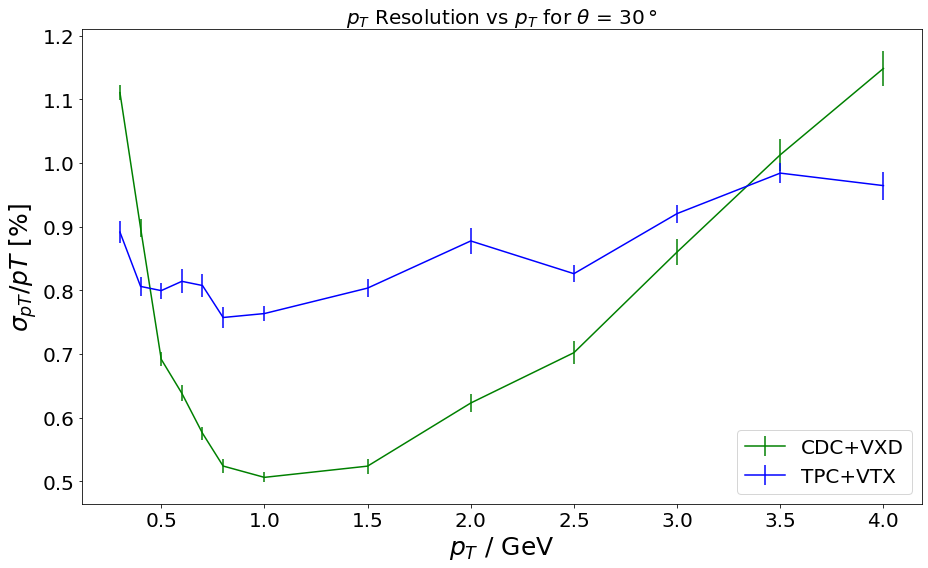

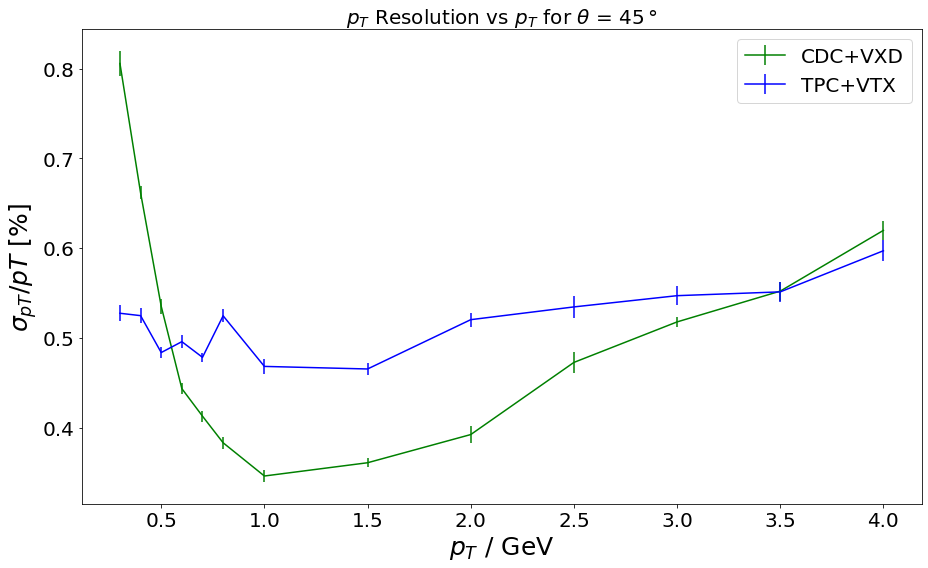

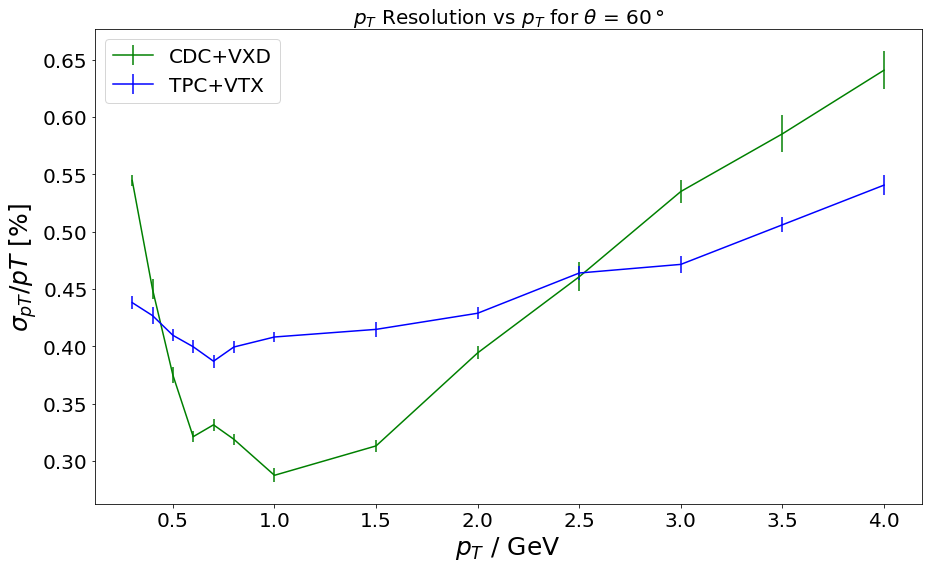

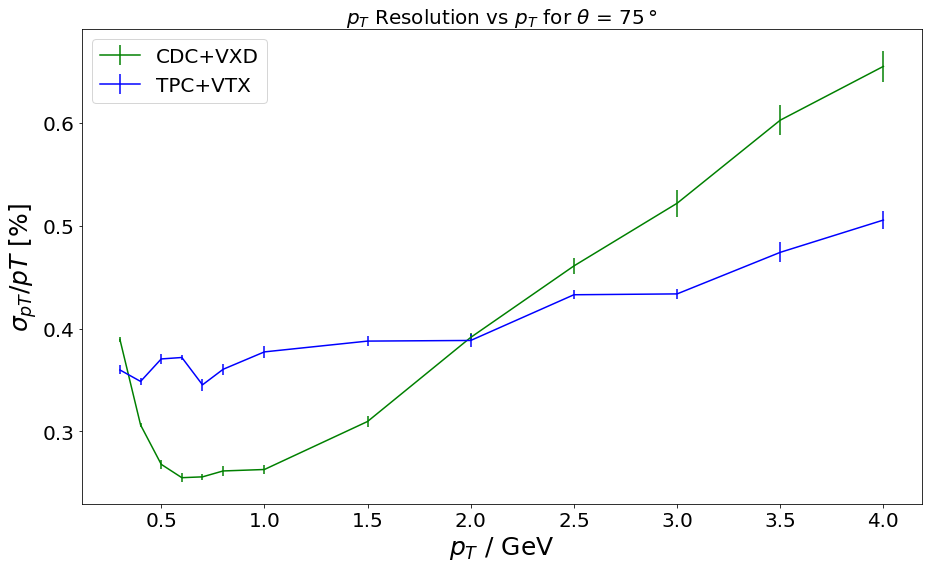

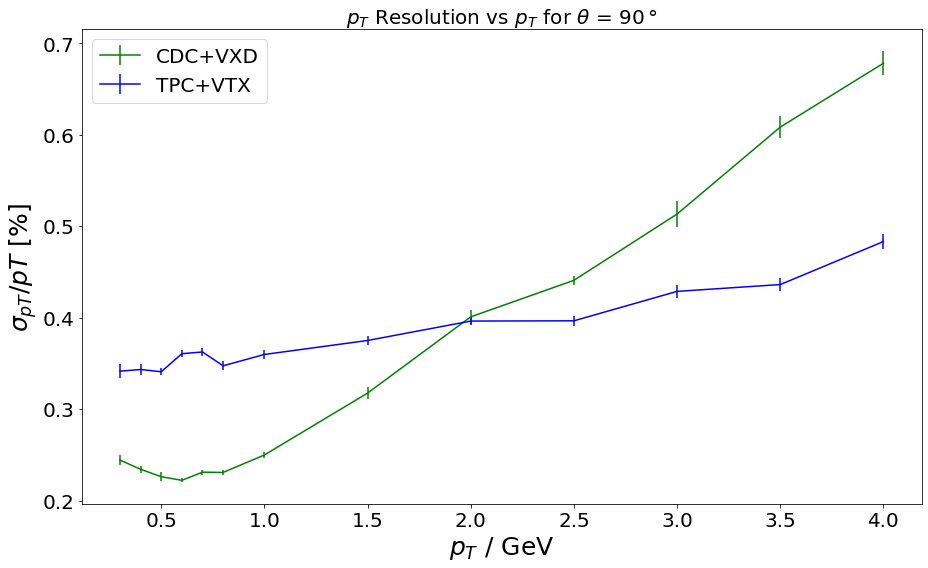

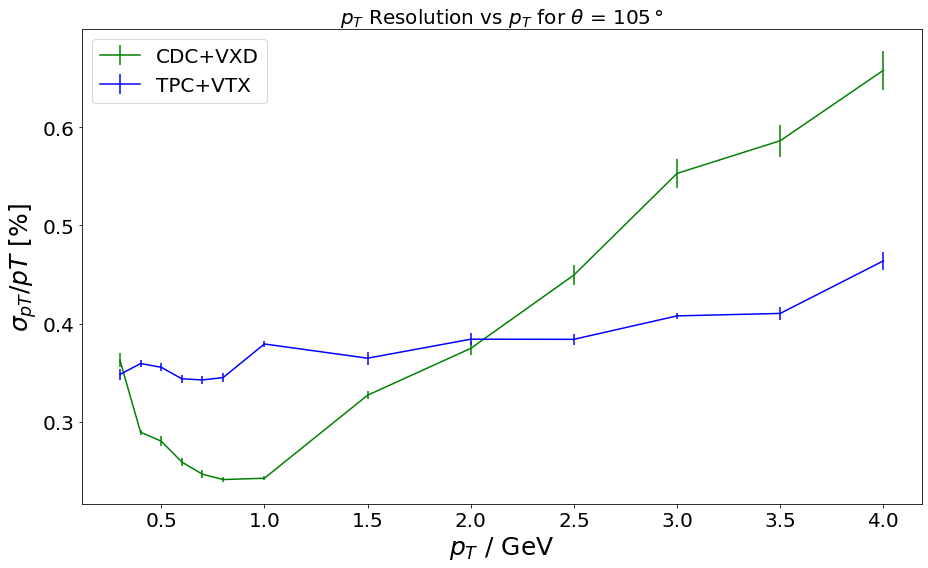

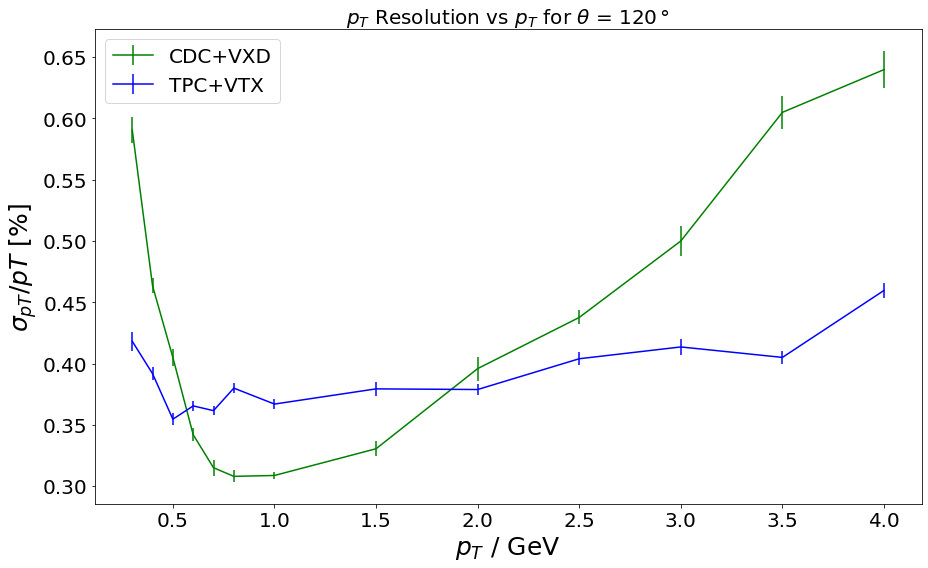

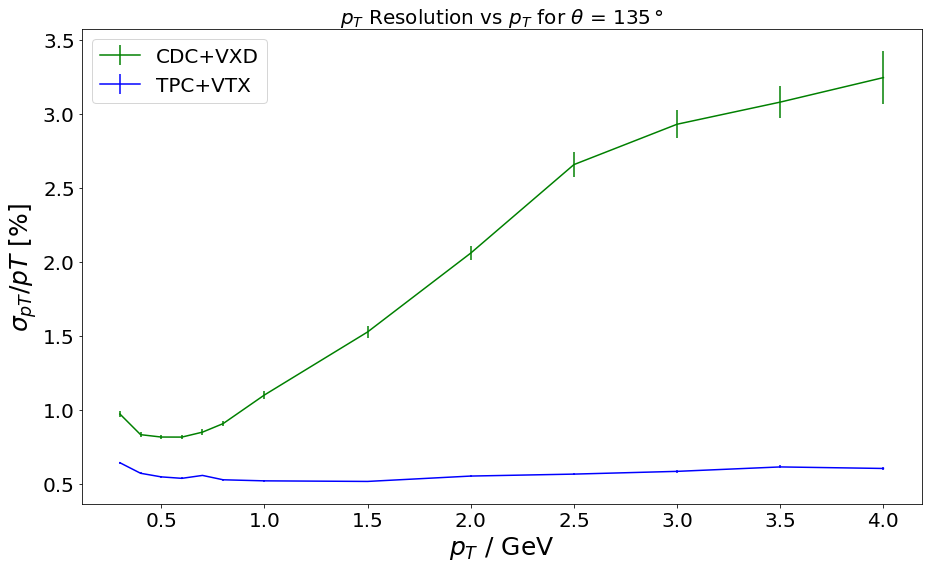

In [288]:
for t in thetas:
    dfTPC = DT_THETA['df_theta'+t]
    dfCDC = DTCDC_THETA['df_theta'+t]
    ChristianPlotsPT(dfTPC, dfCDC, t)

In [293]:
def ChristianPlotsTHETA(df1, df2, ptval):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    mz = 0
    fmt='+'

    plt.errorbar(x=df2['thts'], y=df2['res']*100, label='CDC+VXD', markersize=mz, color='green', yerr=df2['std']*100)
    plt.errorbar(x=df1['thts'], y=df1['res']*100, label='TPC+VTX', markersize=mz, color='blue', yerr=df1['std']*100)
    
    plt.gca().invert_xaxis()
    
    #plt.vlines(34.64, 0.3, 1.9, ls='--', color='black')
    #plt.vlines(127.19, 0.3, 1.9, ls='--', color='black')
    plt.axvline(x=34.64, ymin=0.0, ymax = 1.0, color='k', ls='--')
    plt.axvline(x=127.19, ymin=0.0, ymax = 1.0, color='k', ls='--')
    
    ax.set_ylabel(r'$\sigma_{pT}$$/pT$ [%]', fontsize=25)
    #ax.set_yscale('log')
    ax.set_xlabel(r'$\theta$ / °', fontsize=25)
    #ax.set_xscale('log')
    ax.tick_params(labelsize=20)
    plt.legend(fontsize=20)
    plt.title(r'$p_T$ Resolution vs $\theta$ for $p_T$ = '+ptval+r'$\,$MeV', fontsize=25)
    #plt.title('pT Resolution with '+eff+ r'% $e^-$ efficiency and $50\,\mu$m pixel pitch', fontsize=20)
    fig.tight_layout()
    plt.savefig('/home/andreas/Master/Thesis/ubonn-thesis-7.0/mythesis/figs/resolution/appendix/pTRes_pT'+ptval+'.png')

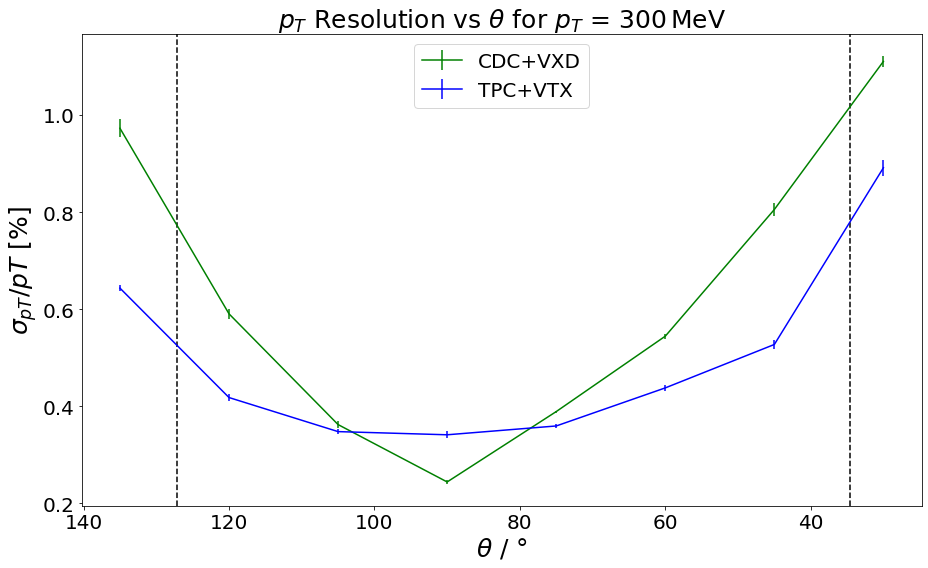

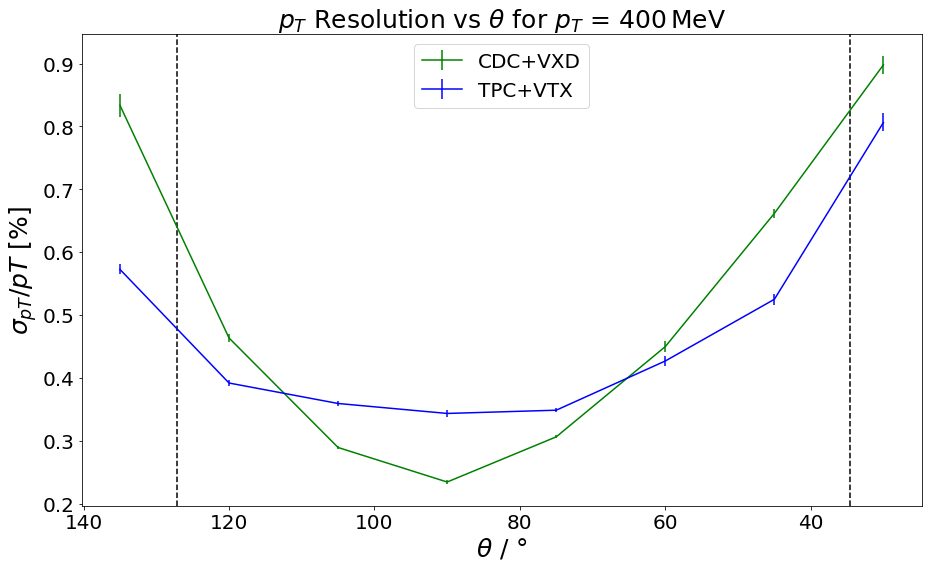

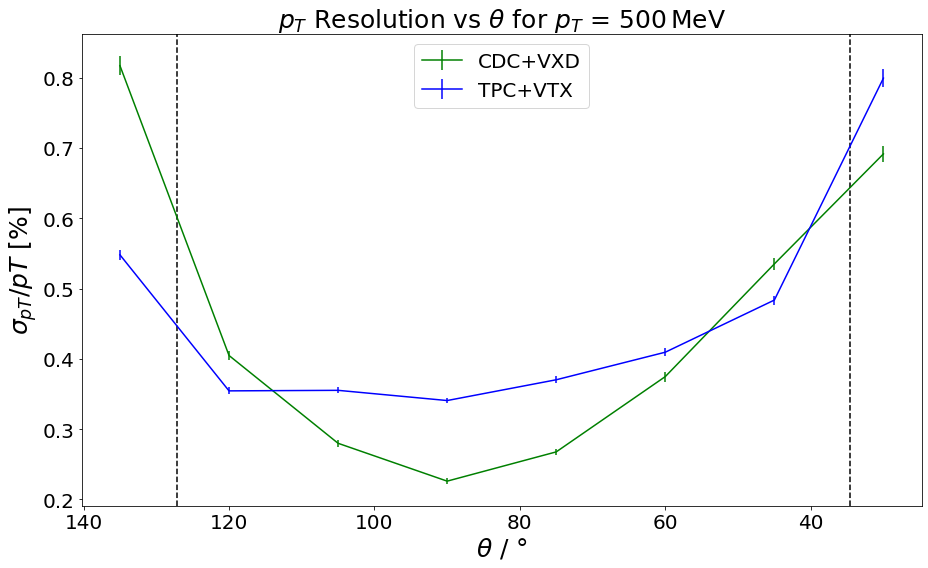

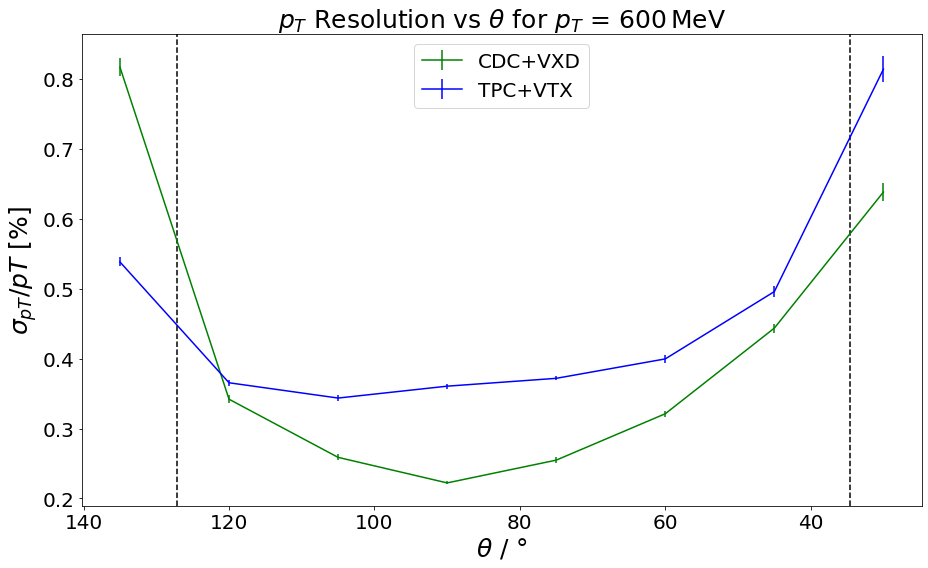

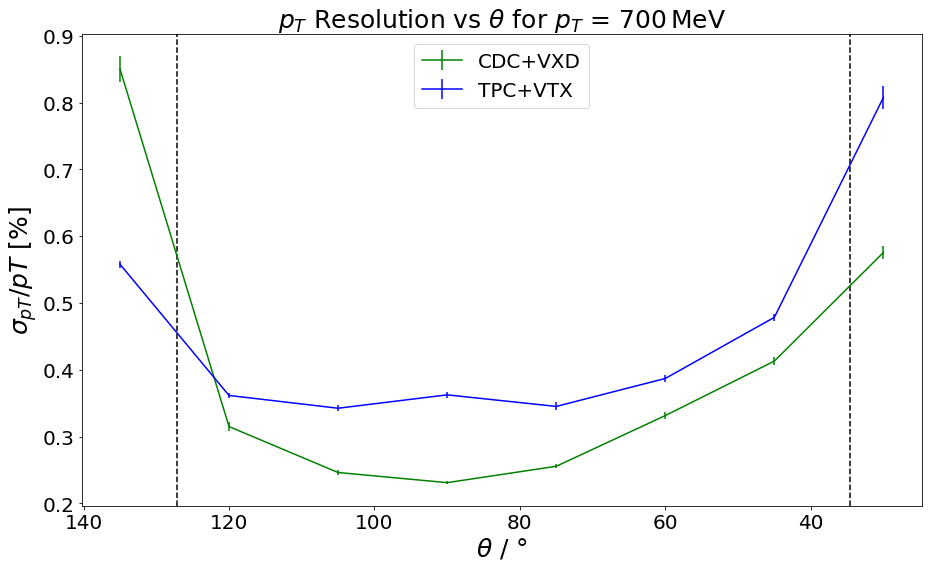

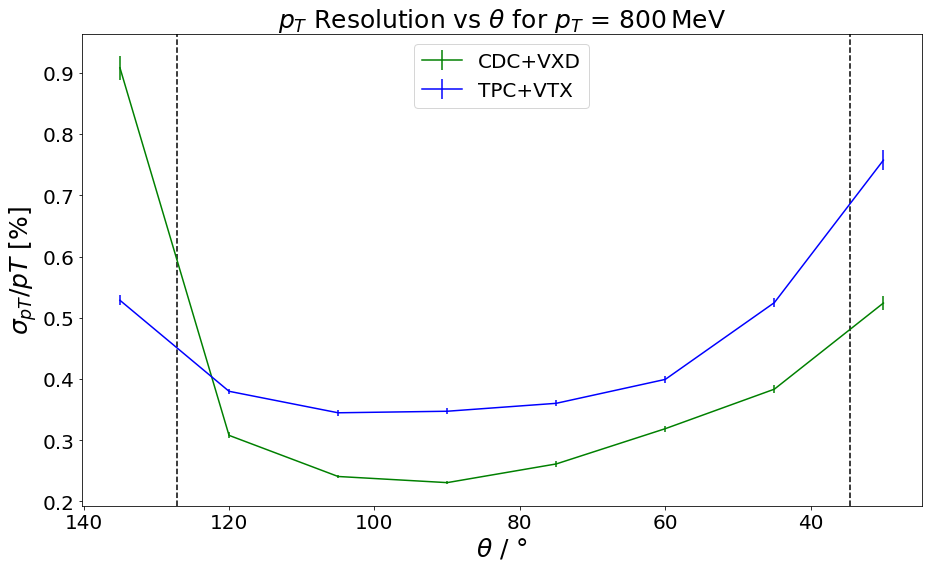

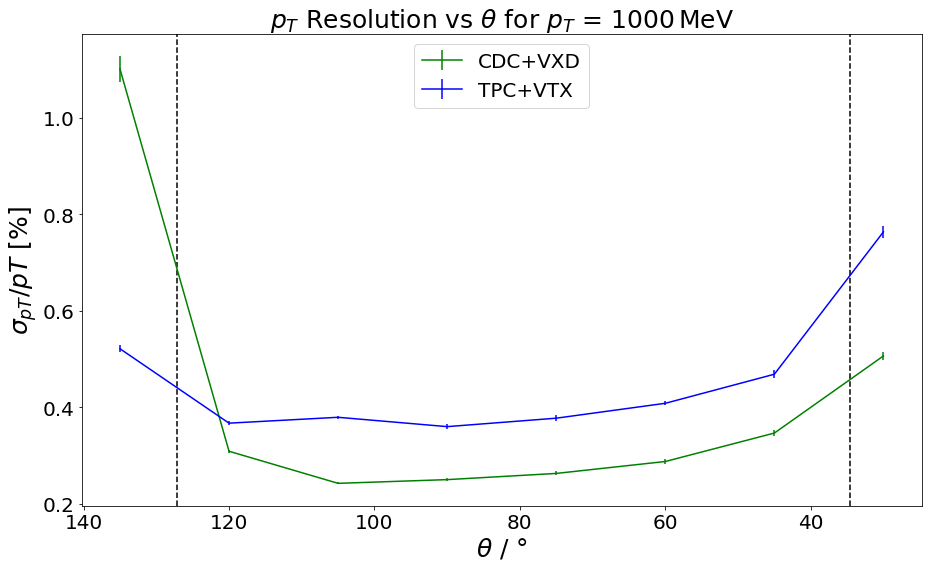

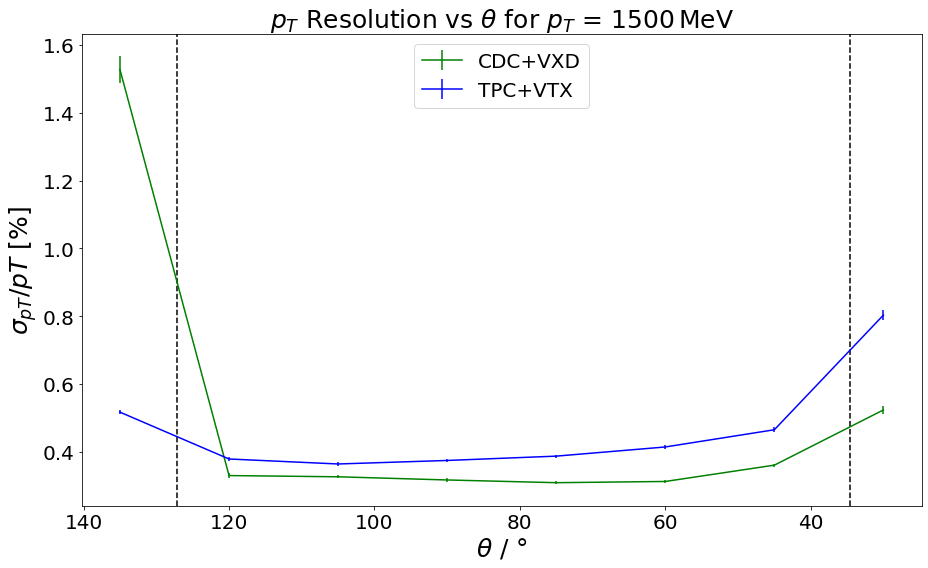

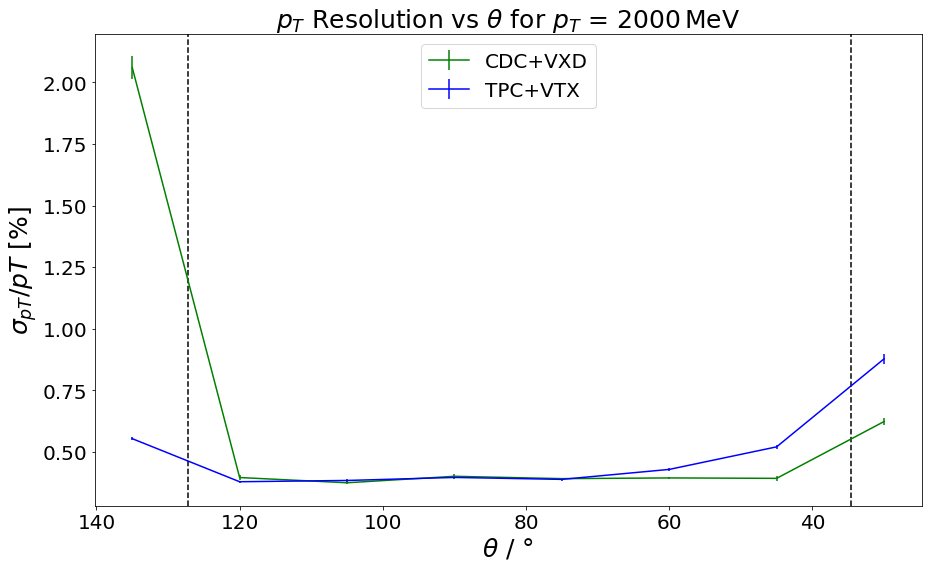

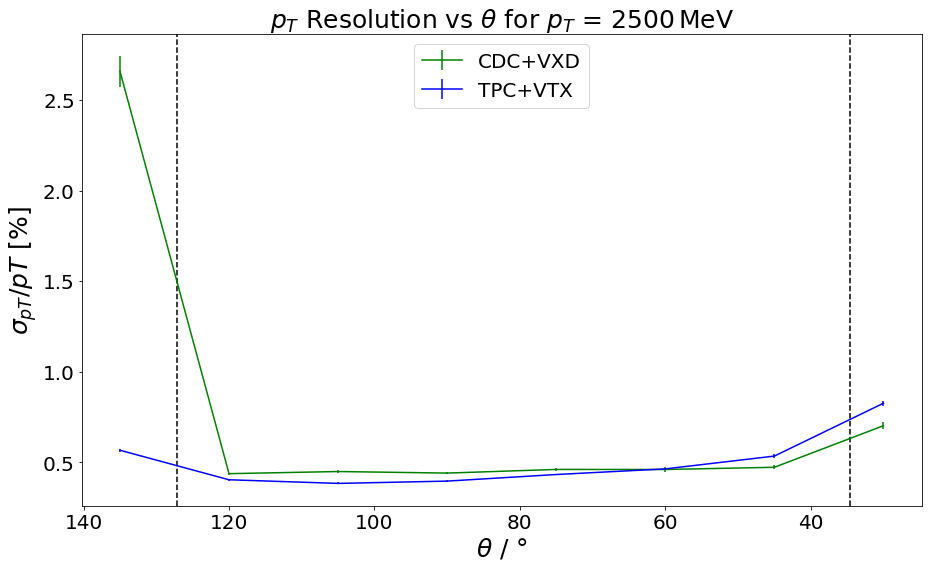

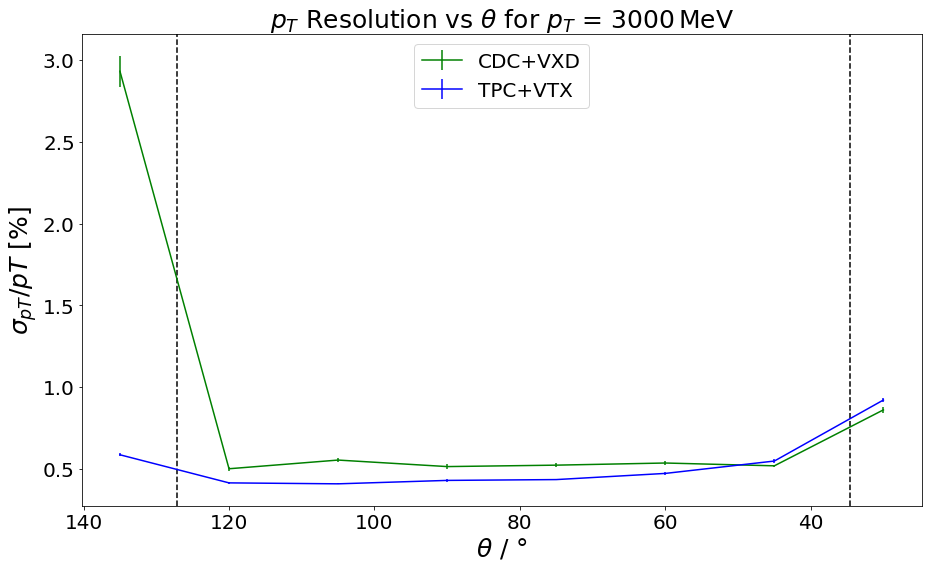

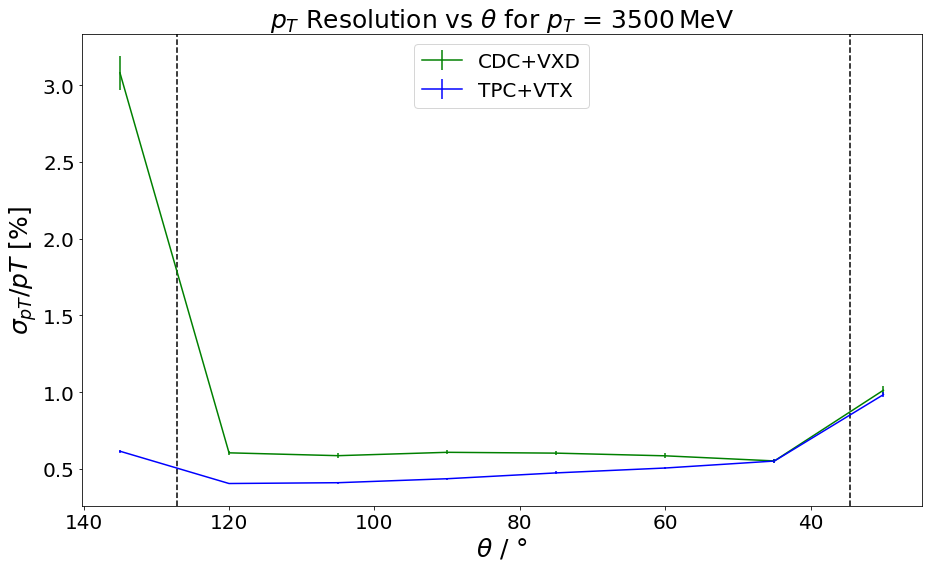

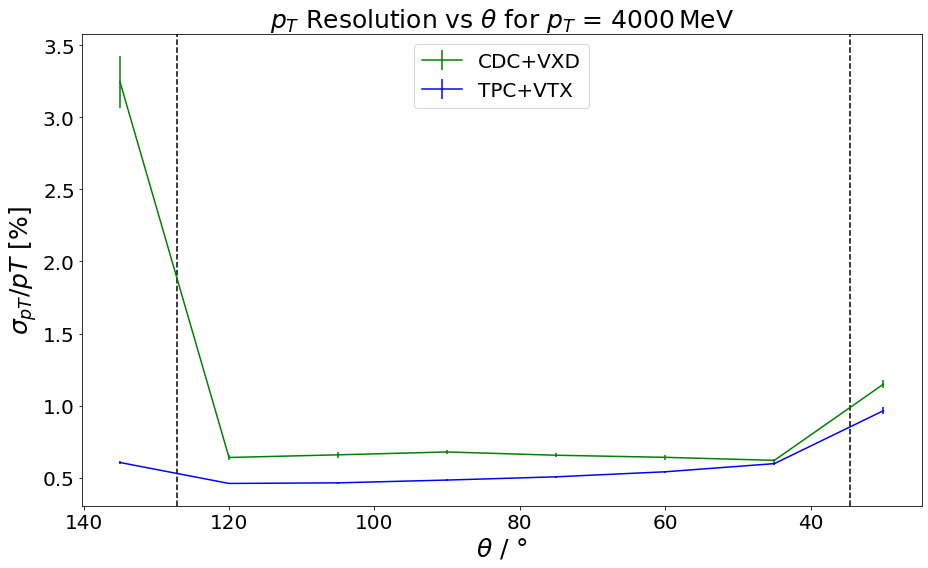

In [294]:
for m in momenta:
    dfTPC = DT_PT['df_pT'+m]
    dfCDC = DTCDC_PT['df_pT'+m]
    ChristianPlotsTHETA(dfTPC, dfCDC, m)